# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import glob
import re

## Access Files

First step is to navigate to the `Rosenthal` folder under `gallina` and load all the files into an iglob iterator.

### Rosenthal Folder

In [2]:
print("Current directory:",os.getcwd())

Current directory: /mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/notebooks


In [3]:
# Check if the Rosenthal directory exists
ros_path = "/mnt/rds/redhen/gallina/Rosenthal/"
print("Directory exists:",os.path.isdir(ros_path))

# Check that the Rosenthal directory is not empty
ros_items = os.listdir(ros_path)
if len(ros_items)==0:
    print("Error! Directory is empty")
else:
    # If not empty print the subdirectories
    print("Items in directory:",ros_items)

Directory exists: True
Items in directory: ['1972', '1978', '1985', '1961', '1982', '1988', '2006', '1975', '1971', '1962', '1986', '1981', '2005', '1976', '1990', '1974', '1989', '1983', '1960', '1984', '1979', '1973', '1977', '1980', '1987', '1969', '1963']


In [4]:
# Starting index of the file name (used to remove path info)
FILE_START_INDEX = 58

In [5]:
# Method to traverse through all of the iglob files recursively
def traverse_iglob(files):
    # Establish a counter variable to keep track of no of files.
    ctr=0
    # Maintain a list to extract only the file names
    files_split=[]
    
    # Loop through the iglob iterator and update the variables
    for file in files:
        print(file)
        ctr+=1
        file_split = file[FILE_START_INDEX:].split('_')
        year, month, day = file_split[0].split('-')
        files_split.append([file_split[0]]+[year]+[month]+[day]+file_split[1:5]+[file_split[-1]])
    return ctr,files_split

In [6]:
# Crete iglob iterator for all mp4 files
mp4_files = glob.iglob(ros_path+"**/*.mp4", recursive=True)

# Use method to extract file count and name
mp4_ctr, mp4_files_split = traverse_iglob(mp4_files)

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-05/1972-02-05_0000_US_00028650_B0_B51_MB48_H12_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-05/1972-02-05_0000_US_00028649_B0_B33_MB35_E9_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-05/1972-02-05_0000_US_00028651_B0_B48_MB32_E11_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-02/1972-02-02_0000_US_00028653_B0_B6_M6_E6_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-02/1972-02-02_0000_US_00028655_B0_B6_M6_E6_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-02/1972-02-02_0000_US_00028654_B0_B51_MB48_H12_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-02/1972-02-02_0000_US_00028652_B0_B6_M6_E6_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-01/1972-02-01_0000_US_00028657_B0_B10_MB52_H19_TL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-01/1972-02-01_0000_US_00028659_B0_B33_MB35_E9_TL.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-16/1985-06-16_0000_US_00023872_B0_B46_M2_E7_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-05/1985-06-05_0000_US_00023889_B0_B48_MB32_E11_DG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-20/1985-06-20_0000_US_00021558_B0_B12_M6_E6_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-20/1985-06-20_0000_US_00022055_B0_B12_M6_E6_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-15/1985-06-15_0000_US_00023873_B0_B53_MB52_H19_AZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-06/1985-06-06_0000_US_00023894_B0_B47_M4_E10_DG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-06/1985-06-06_0000_US_00023886_B0_B54_MB40_E8_AD_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-11/1985-12-11_0000_US_00041634_B0_B58_MB32_E11_PL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-29/1985-12-29_0000_US_00041176_B0_B49_MB42_E5_HL.mp4
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-11/1985-11-20/1985-11-20_0000_US_00022059_B0_B36_MB40_E8_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-18/1985-02-18_0000_US_00041517_B0_B47_M4_E10_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-18/1985-02-18_0000_US_00020161_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-10/1985-02-10_0000_US_00043979_B0_B46_M2_E7_PL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-09/1985-02-09_0000_US_00043066_B0_B49_MB42_E5_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-09/1985-02-09_0000_US_00043066_B0_B36_MB11_E3_MB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-03/1985-02-03_0000_US_00043052_B0_BP2_MB46_H10_KH_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-13/1985-02-13_0000_US_00043062_B0_B51_MB48_H12_JA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-17/1985-08-17_0000_US_00043067_B0_B54_MB40_E8_KH.mp4
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/1961/1961-01/1961-01-20/1961-01-20_0000_US_00020065_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1961/1961-09/1961-09-26/1961-09-26_0000_US_00028908_V0_VHS46_MB21_H9_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001831_B4_B64_M10_H44_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001831_B4_B58_M45_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001845_B3_B12_M21_H40_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001839_B2_B69_M32_E3_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_00020159_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-17/1982-06-17_0000_US_NA001824_B2_B67_M7_H28_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-17/1982-06-17_0000_US_NA001819_B5_B67_M7_H28_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-01/1982-01-01_0000_US_00018833_B0_B43_MB48_H12_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-08/1982-01-08_0000_US_00022014_B0_B49_MB42_E5_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-11/1982-01-11_0000_US_NA020098_B0_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-23/1982-01-23_0000_US_00020167_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-29/1982-01-29_0000_US_NA020102_B0_B82_M29_H41_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-24/1982-01-24_0000_US_NA020100_B0_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-24/1982-01-24_0000_US_NA020099_B0_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-01/1982-01-05/1982-01-05_0000_US_00023673_B0_B47_M4_E10_NN_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-05/1982-05-06/1982-05-06_0000_US_00043008_B0_B36_MB11_E3_TM_BE.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/1982/1982-09/1982-09-26/1982-09-26_0000_US_NA020126_B0_B73_M39_E2_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-09/1982-09-09/1982-09-09_0000_US_NA002138_B2_B12_M21_H40_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-09/1982-09-22/1982-09-22_0000_US_00023668_B0_B46_M2_E7_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-09/1982-09-10/1982-09-10_0000_US_00022071_B0_B47_M4_E10_JA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-09/1982-09-25/1982-09-25_0000_US_00043956_B0_B10_MB52_H19_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-09/1982-09-15/1982-09-15_0000_US_00020100_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-09/1982-09-20/1982-09-20_0000_US_00041516_B0_B36_MB40_E8_DG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-06/1982-03-06_0000_US_NA020111_B0_B7_M35_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-15/1982-03-15_0000_US_NA020113_B0_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-05/1988-05-27/1988-05-27_0000_US_NA017505_B13_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019860_B14_BP3_M46_E1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019859_B13_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019857_B10_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019839_B7_B70_M25_H42_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019841_B9_B33_M40_H14_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019838_B6_B58_M19_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019840_B8_B37_M37_H47_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-15/1988-11-15_0000_US_NA019861_B14_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019988_B13_B10_M43_E6_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019963_B3_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019965_B5_B58_M19_H30_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019979_B4_B33_M40_H14_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019971_B11_B37_M37_H47_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019962_B2_B12_M21_H40_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019966_B6_B64_M10_H44_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019968_B8_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-24/1988-11-24_0000_US_NA019973_B13_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019955_B11_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019946_B2_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019950_B6_B80_M20_E7_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019952_B8_B73_M39_E2_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019970_B10_BP3_M46_E1_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019951_B7_B75_M42_H38_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019954_B10_B12_M21_H40_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019947_B3_BP3_M46_E1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-23/1988-11-23_0000_US_NA019960_B14_B64_M10_H44_JM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019820_B1_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019824_B5_B64_M10_H44_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019823_B4_B58_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019822_B3_BP3_M46_E1_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019825_B6_B70_M25_H42_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019847_B14_B82_M29_H41_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019846_B14_B1_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019833_B1_BP3_M46_E1_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-14/1988-11-14_0000_US_NA019842_B10_B78_M22_E22_JM.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019697_B14_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019675_B7_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019677_B9_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019671_B3_B12_M21_H40_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019670_B2_B73_M39_E2_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019673_B5_B75_M42_H38_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_00023829_B0_B37_MB49_H14_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019674_B6_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-03/1988-11-03_0000_US_NA019680_B12_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-15/1988-02-15_0000_US_00043438_B0_B53_MB52_H19_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-15/1988-02-15_0000_US_00043322_B0_B46_M2_E7_KY.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-15/1988-02-15_0000_US_00043438_B0_B49_MB42_E5_KY_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-27/1988-02-27_0000_US_00020147_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-06/1988-02-06_0000_US_00041165_B0_B7_MB48_H12_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-06/1988-02-06_0000_US_00041166_B0_B53_MB52_H19_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-06/1988-02-06_0000_US_00041164_B0_B7_MB48_H12_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-08/1988-02-08_0000_US_00043444_B0_B36_MB40_E8_KY_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-08/1988-02-08_0000_US_00043445_B0_B37_MB49_H14_KY.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018531_B6_B10_M43_E6_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018527_B2_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018536_B11_B69_M32_E17_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018530_B5_B12_M21_H40_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA022016_B0_B12_M21_H40_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018548_B10_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018552_B14_B33_M40_H14_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018528_B3_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-11/1988-08-11_0000_US_NA018550_B12_B69_M32_E17_JM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018546_B8_B64_M10_H44_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018547_B9_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018541_B3_B1_M41_E5_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA022017_B0_B10_M43_E6_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018560_B12_B82_M29_H41_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018555_B5_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018544_B6_BP3_M46_E1_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018540_B2_B7_M35_E3_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-12/1988-08-12_0000_US_NA018549_B11_B1_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-06/1988-08-06_0000_US_00023835_B0_B54_MB40_E8_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-06/1988-08-06_0000_US_NA018478_B8_B55_M38_H48_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-06/1988-08-06_0000_US_NA018480_B10_B55_M38_H48_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-06/1988-08-06_0000_US_00010491_B0_B33_M18_E9_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-06/1988-08-06_0000_US_NA018479_B9_B70_M25_H42_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-06/1988-08-06_0000_US_00010497_B0_B49_MB42_E5_PL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-06/1988-08-06_0000_US_00010489_B0_B30_M13_H19_HM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-04/1988-08-04_0000_US_NA018465_B12_B7_M35_E3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-04/1988-08-04_0000_US_NA018425_B7_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018499_B2_B12_M21_H40_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018504_B7_B81_M7_H28_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018506_B9_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018503_B6_BP3_M46_E1_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018500_B3_B10_M43_E6_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018525_B14_B1_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018502_B5_B63_M19_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018508_B11_B80_M20_E7_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-09/1988-08-09_0000_US_NA018521_B10_B75_M42_H38_JM.mp4
/mnt/rds/redhen/gallina/Rosenth

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA018649_B3_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA018647_B1_B78_M22_E22_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA018653_B7_B82_M29_H41_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_00041058_V0_VHS50_MB20_H17_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA018661_B8_B37_M37_H47_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA022032_B0_B70_M25_H42_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA018562_B5_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA018658_B14_B69_M32_E17_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-19/1988-08-19_0000_US_NA018660_B5_B69_M32_E17_CF.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021195_B10_B78_M22_E22_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021181_B8_B67_M7_H28_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021180_B7_B37_M37_H47_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021190_B4_B58_M19_H30_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021176_B3_B69_M32_E3_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021186_B13_B10_M43_E6_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021199_B14_B81_M29_H41_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021179_B6_B10_M43_E6_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021177_B4_B10_M43_E6_DG.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020908_B8_B81_M29_H41_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020912_B12_B1_M41_E5_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020891_B2_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020909_B9_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020901_B13_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020910_B10_B81_M29_H41_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020892_B3_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-03/1988-12-03_0000_US_NA020911_B11_B80_M20_E7_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-22/1988-12-22_0000_US_NA021132_B4_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021052_B14_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021048_B12_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021039_B3_BP3_M46_E20_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021054_B4_B67_M7_H28_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021064_B14_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021043_B7_B70_M25_H42_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021059_B9_B80_M20_E7_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021042_B6_B55_M38_H48_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-15/1988-12-15_0000_US_NA021051_B14_B73_M39_E2_AR.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020878_B3_B73_M39_E2_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020898_B10_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020896_B8_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020881_B6_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020899_B11_B69_M32_E3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020882_B7_B73_M39_E2_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020886_B11_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020902_B14_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-02/1988-12-02_0000_US_NA020893_B4_B37_M37_H47_MM.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-11/1988-01-11_0000_US_00040716_B0_B36_MB11_E3_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-29/1988-01-29_0000_US_00021590_B0_B47_MB55_E10_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-29/1988-01-29_0000_US_00043447_B0_B12_M6_E6_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-29/1988-01-29_0000_US_00021590_B0_B47_M4_E10_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-23/1988-01-23_0000_US_00041128_B0_B36_MB11_E3_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-02/1988-01-02_0000_US_00041781_B0_B33_MB35_E9_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-27/1988-01-27_0000_US_00043431_B0_B33_MB57_E9_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-27/1988-01-27_0000_US_00041744_B0_B33_MB57_E9_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-15/1988-01-15_0000_US_00041127_B0_B6_M6_E6_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-03/1988-09-03_0000_US_NA018853_B10_B69_M32_E17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-03/1988-09-03_0000_US_NA018843_B11_B63_M19_H30_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-03/1988-09-03_0000_US_NA018851_B8_B80_M20_E7_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-03/1988-09-03_0000_US_NA022041_B0_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-03/1988-09-03_0000_US_NA018852_B9_B7_M35_E3_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-03/1988-09-03_0000_US_NA018844_B13_B7_M35_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-03/1988-09-03_0000_US_NA018764_B12_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-09/1988-09-09_0000_US_NA018941_B14_B82_M29_H41_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-09/1988-09-09_0000_US_NA018937_B11_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018884_B1_B10_M43_E6_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018896_B13_B37_M37_H47_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018914_B14_BP3_M46_E1_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_00010414_B0_B11_M15_E5_HM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018913_B13_B81_M7_H28_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018885_B2_B63_M19_H30_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018886_B3_B75_M42_H38_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018888_B5_B1_M41_E5_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-07/1988-09-07_0000_US_NA018899_B14_B70_M25_H42_QG.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019201_B6_BP3_M46_E1_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019222_B12_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019205_B10_B69_M32_E17_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019210_B14_B80_M20_E7_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019214_B4_B1_M41_E5_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019204_B9_B78_M22_E22_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019203_B8_B58_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019213_B3_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-29/1988-09-29_0000_US_NA019141_B14_B1_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019019_B10_B7_M35_E3_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019020_B8_B78_M22_E22_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019031_B8_B70_M25_H42_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019039_B9_B37_M37_H47_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019028_B4_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019038_B2_B64_M10_H44_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019023_B11_B82_M29_H41_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019033_B10_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-16/1988-09-16_0000_US_NA019025_B13_B82_M29_H41_QG.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019026_B14_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019005_B9_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA018998_B2_B45_M30_E15_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019007_B11_B80_M20_E7_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019009_B13_B63_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019012_B14_BP3_M46_E1_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019004_B8_B12_M21_H40_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019002_B6_B78_M22_E22_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-15/1988-09-15_0000_US_NA019024_B12_B82_M29_H41_TM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019250_B2_B78_M22_E22_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019255_B7_B1_M41_E5_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019254_B6_B73_M39_E2_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019263_B14_B63_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019251_B3_B10_M43_E6_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019256_B8_B33_M40_H14_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019261_B13_BP3_M46_E1_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019273_B10_B12_M21_H40_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019249_B1_B75_M42_H38_QG.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019321_B14_B66_M7_H28_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019330_B12_B80_M20_E7_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019308_B2_B58_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019311_B5_B75_M42_H38_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019317_B11_B80_M20_E7_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019312_B6_B10_M43_E6_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019327_B9_B37_M37_H47_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019324_B5_B78_M22_E22_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019313_B7_B12_M21_H40_CF.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019634_B12_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019626_B4_B82_M29_H41_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019636_B14_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_00041788_B0_B47_MB37_E10_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019613_B4_B58_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019622_B13_B80_M20_E7_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019630_B8_B12_M21_H40_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019614_B5_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-30/1988-10-30_0000_US_NA019623_B14_B78_M22_E22_QG.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019575_B3_B1_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019581_B9_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019583_B11_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019578_B6_B1_M41_E5_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019574_B2_B58_M19_H30_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019597_B12_B37_M37_H47_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019589_B4_B78_M22_E22_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019583_B11_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-27/1988-10-27_0000_US_NA019598_B14_B10_M43_E6_QG.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-04/1988-04-04_0000_US_NA016807_B0_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-04/1988-04-04_0000_US_00040754_B0_B47_M4_E10_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-22/1988-04-22_0000_US_00040760_B0_B7_MB48_H12_JG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-09/1988-04-09_0000_US_00010641_B0_B51_MB48_H12_BW.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-09/1988-04-09_0000_US_00020424_U0_U3_M9_EG1_SC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00043091_B0_B10_MB52_H19_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00010640_B0_B47_M4_E10_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00040746_B0_B46_M2_E7_AZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00020423_U0_U2_M13_EG1_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA022007_B0_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA022006_B0_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA018301_B4_B69_M32_E17_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA018307_B10_B64_M10_H44_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-17/1988-07-17_0000_US_00041062_B0_B7_MB48_H12_KH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-17/1988-07-17_0000_US_NA018438_B0_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-17/1988-07-17_0000_US_00043103_B0_B33_MB57_E9_KH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-17/1988-07-17_0000_US_00043102_B0_B33_MB57_E9_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-10/1988-07-10_0000_US_NA017994_B5_B78_M22_E22_JM.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-21/2006-12-21_0000_US_00018504_V11_VHS15_MB4_H12_SB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-21/2006-12-21_0000_US_00018493_V12_VHSP11_MB6_H8_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-21/2006-12-21_0000_US_00018479_V10_VHS23_MB22_E1_SB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-21/2006-12-21_0000_US_00018503_B0_VHS27_MB12_H5_JP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-05/2006-01-05_0000_US_00003004_V13_VHS6_MB12_H5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-05/2006-01-05_0000_US_00000640_V3_M1_VHSP3_H3_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-05/2006-01-05_0000_US_00001820_V10_VHS6_MB12_H5_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-05/2006-01-05_0000_US_00001029_V11_M2_VHS10_H4_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-05/2006-01-05_0000_US_00001673_V12_VHSP7_MB17_H13_JN.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00003163_V12_VHS2_MB6_H8_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00001167_V8_VHS50_MB20_H17_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00000809_V11_M2_VHS10_H4_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00000256_V6_MB6_VHS8_H10_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00001167_V8_VHS41_MB45_H29_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00002143_V5_VHSP25_MB27_H22_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00003691_V2_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00002379_V4_VHS4_MB1_E1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-27/2006-01-27_0000_US_00000215_V3_M2_VHS10_H4_CG.mp4
/mnt/rds/re

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00002387_V4_VHS4_MB17_E1_PS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00001431_V5_VHS14_MB13_H1_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00002996_V13_VHSP9_M7_H16_MM_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00000289_V3_VHS35_MB41_H26_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00002996_V13_VHS16_MB13_H15_BW.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00003175_V12_VHS9_MB14_H12_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00000905_V11_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00002620_V2_VHSP18_MB10_H24_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-17/2006-01-17_0000_US_00000289_V3_MB1_VHS4_E1_LS.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00001346_V4_VHSP4_MB9_H14_PA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00003897_V3_MB1_VHS15_EB1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00003958_V2_M2_VHS10_H4_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00001346_V4_VHS18_MB5_H7_AK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00000477_V5_MB13_VHS14_H1_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00003481_V1_MB13_VHS14_H13_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00000159_V11_MB15_VHS1_E2_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00000703_V12_MB1_VHS4_E1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-07/2006-06-07_0000_US_00001033_V13_MB7_VHS7_H11_GG.mp4
/mnt/rds/redh

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00001342_V4_VHSP1_MB18_H2_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00000461_V5_MB13_VHS14_H1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00000152_V11_VHS16_MB13_H15_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00001484_V2_MB9_VHSP4_H14_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00000152_V11_MB1_VHS4_E1_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00000697_V12_MB1_VHS4_E1_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00000845_V10_MB7_VHS7_H11_LS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_Archive_V3_MB1_VHS1_EB1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-08/2006-06-08_0000_US_00000152_V11_MB9_VHSP4_H5_JK_BE.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00003544_V3_M1_VHS9_H3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00000157_V11_M2_VHS10_H4_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00001046_V13_MB7_VHS7_H11_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00003544_V3_VHS51_MB22_H37_RX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00001347_V4_VHSP1_MB18_H2_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00002751_V1_M1_VHS9_H3_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00003544_V3_VHS43_MB31_H27_MB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00000487_V5_MB13_VHS14_H1_LS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-06/2006-06-06_0000_US_00003488_V2_MB10_VHS6_H12_JK.mp4
/mnt/rds/red

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-09/2006-11-09_0000_US_00018351_V3_VHS15_MB4_H12_DJ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-07/2006-11-07_0000_US_00007242_V_VHS12_MB12_H5_AW.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-07/2006-11-07_0000_US_00007242_V_VHS9_MB4_H12_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-07/2006-11-07_0000_US_00018380_V7_VHS5_MB5_H7_ST.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-14/2006-11-14_0000_US_00018259_V4_VHS42_MB6_H20_AK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-14/2006-11-14_0000_US_00000253_V2_MB7_VHS7_H11_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-14/2006-11-14_0000_US_00018259_V4_VHS35_MB41_H26_JA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-13/2006-11-13_0000_US_00018687_V1_VHSP21_MM1_H6_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-13/2006-11-13_0000_US_00018684_V3_VHSP20_MB23_H4_LA.mp4
/mnt/rds/re

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00003633_V5_MB5_VHS5_H7_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00008456_V0_VHS9_MB4_H12_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00002805_V12_MB10_VHS6_H12_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00000513_V4_MB14_VHSP1_E3_LS_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00000513_V4_MB14_VHSP1_E3_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00003943_V11_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00003609_V1_M1_VHS9_H3_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00002864_V10_M1_VHS9_H3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-29/2006-08-29_0000_US_00004072_V3_MB2_VHS2_H8_CG.mp4
/mnt/rds/redhen/g

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00003462_V5_MB9_VHS11_H1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00002716_V3_MB8_VHS4_E1_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00002610_V13_MB5_VHS5_H7_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00004018_V1_MB8_VHS4_E1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00001025_V4_MB9_VHSP4_H14_GG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00004018_V1_VHS38_MB4_H31_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00003550_V2_MB2_VHS2_H8_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00002866_V11_MB5_VHS5_H7_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-09/2006-08-09_0000_US_00000587_V10_MB10_VHS6_H12_JK.mp4
/mnt/rds/redhen

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00001316_V3_VHSP6_MB15_E2_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00003905_V10_MB11_VHSP2_E2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00002823_V12_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00003931_V1_MB7_VHS7_H11_JN_2.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00002823_V12_VHS43_MB31_H27_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00003931_V1_M1_VHS9_H3_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00004057_V3_MB13_VHS14_H13_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00004054_V2_MB11_VHS8_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-17/2006-08-17_0000_US_00003612_V5_MB13_VHS14_H13_CG.mp4
/mnt/rds/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001024_V10_MB3_VHS3_H9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001425_V5_VHS14_MB13_H1_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00003023_V13_VHSP5_MB8_EB1_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001610_V12_MB8_VHSP5_EB1_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00003086_V4_VHS4_MB17_E1_LZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00003706_V2_M1_VHS9_H3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00000623_V11_VHS38_MB4_H31_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001610_V12_VHS39_MB9_H32_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00000072_V3_MB8_VHS4_E1_CG.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00003087_V4_VHS52_MB19_E4_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00001426_V5_VHS8_MB10_H10_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00003024_V13_VHS8_MB10_H10_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00003087_V4_VHSP7_M4_H13_LZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00000624_V11_VHS39_MB9_H32_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00000088_V3_MB8_VHS4_E1_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00001035_V10_MB3_VHS3_H9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00001665_V12_VHSP7_MB17_H13_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-22/2006-02-22_0000_US_00001665_V12_MB1_VHS4_E1_JN.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00003088_V4_VHS3_MB3_E3_DC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00001239_V10_MB12_VHS6_H5_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00003033_V5_VHS12_MB11_H6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00000629_V11_M2_VHS10_H4_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00001768_V12_VHSP5_MB8_EB1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00000700_V3_VHSP25_MB27_H22_ON_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00002824_V1_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00000700_V3_MB9_VHSP4_H5_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-21/2006-02-21_0000_US_00000700_V3_VHS38_MB4_H31_AD_BE.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-28/2006-05-28_0000_US_00001620_V13_MB7_VHS7_H11_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003054_V4_VHSP7_M4_H13_ES.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00001566_V13_MB7_VHS7_H11_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003997_V1_MB2_VHS2_H8_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003670_V3_MB12_VHS13_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00000258_V11_VHS15_MB24_H1_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00000819_V12_VHS23_M15_E1_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00000768_V10_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003497_V2_MB3_VHS3_H9_MS.mp4
/mnt/rds/redhen

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_00000807_V12_MB2_VHS2_H8_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_Archive_V7_MB1_VHS15_EB1_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_00001221_V14_MB15_VHSP6_E2_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_00001383_V13_MB7_VHS7_H11_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_Archive_V7_MB5_VHS5_H7_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_00001221_V14_VHSP6_MB15_E2_SA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_00003482_V2_M1_VHS9_H3_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_00000239_V11_MB9_VHSP4_H5_CG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-12/2006-05-12_0000_US_00001020_V8_VHS43_MB31_H27_TM_BE.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00002735_V1_M1_VHS9_H3_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000534_V5_MB2_VHS2_H8_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00001350_V4_VHSP1_MB18_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000178_V11_MB10_VHS6_H12_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000751_V12_VHS38_MB4_H31_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00003558_V3_MB12_VHS13_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000751_V12_MB1_VHS4_E1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000906_V10_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00001137_V13_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000022_V11_VHSP20_MB23_H4_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00002873_V12_VHS25_MB56_H38_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000428_V7_MB1_VHS4_E1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000022_V11_M3_VHS11_H13_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00003949_V10_MB12_VHS13_H2_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00002873_V12_M2_VHS10_H4_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000022_V11_U1_M9_EG1_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000068_V11_MB12_VHS13_H2_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00001162_V4_MB9_VHSP10_H14_JK.mp4
/mnt/rds/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00002827_V10_MB10_VHS6_H12_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00002827_V10_VHS31_MB25_H13_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00000148_V5_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00002854_V11_MB9_VHSP1_H5_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00001153_V4_MB18_VHSP7_H13_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00003927_V12_MB10_VHS6_H12_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-28/2006-07-28_0000_US_00003908_V12_VHS24_MB38_H25_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-28/2006-07-28_0000_US_00002049_V4_M1_VHS9_H3_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-28/2006-07-28_0000_US_00000147_V5_M3_VHS11_H13_CG.mp4
/mnt/rds/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00003594_V1_M1_VHS9_H3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00000397_V11_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00000924_V12_MB8_VHSP5_EB1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00002072_V3_MB8_VHS4_E1_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00001600_V13_VHS7_MB7_H11_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00002072_V3_VHS43_MB31_H27_HC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00003594_V1_VHSP20_MB23_H4_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00000913_V5_MB13_VHS14_H1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-12/2006-04-12_0000_US_00000924_V12_VHS40_MB34_H28_AD_BE.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00000344_V11_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00003601_V1_VHS52_MB19_E4_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00003064_V4_VHS7_MB7_H11_DC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00001047_V10_MB3_VHS3_H9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00002876_V3_MB6_VHS8_H10_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00000864_V12_MB1_VHS4_E1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00002743_V2_M2_VHS10_H4_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00003601_V1_MB9_VHSP1_H5_JN_2.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-26/2006-04-26_0000_US_00001591_V13_VHS7_MB7_H11_KE.mp4
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00000936_V12_VHS24_MB38_H25_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00001177_V10_MB12_VHS6_H5_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00002311_V13_VHS3_MB3_E3_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00003572_V1_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00003104_V4_VHS6_MB12_H5_LZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00000418_V11_MB3_VHS3_H9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00002060_V3_MB5_VHS5_H7_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00003104_V4_VHS50_MB20_H17_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-04/2006-04-04_0000_US_00000992_V5_MB13_VHS14_H1_CG.mp4
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00000483_V11_MB3_VHS3_H9_LS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00003565_V1_MB9_VHS11_H1_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00001048_V12_MB1_VHS4_E1_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00003595_V2_MB13_VHS14_H13_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00002317_V13_VHS3_MB3_E3_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00001585_V10_VHS3_MB3_E3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00001116_V5_MB9_VHHSP4_H14_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00001116_V5_VHS8_MB10_H10_CC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-27/2006-03-27_0000_US_00003110_V4_VHS12_MB12_H5_DX.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00000496_V11_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00000269_V11_M1_VHSP3_H3_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00000269_V11_VHS38_MB4_H31_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00001143_V5_MB13_VHS14_H1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00002586_V3_MB3_VHS3_H9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00003132_V12_VHS8_MB10_H10_PS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00001584_V10_VHS50_MB20_H17_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00003581_V2_MB13_VHS14_H13_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-23/2006-03-23_0000_US_00003581_V2_VHS42_MB6_H20_AS.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00001131_V8_VHS34_MB44_H21_NN_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00000953_V10_VHSP20_MB23_H4_AZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00000154_V6_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00002051_V3_VHS41_MB45_H29_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00000560_V11_M2_VHS10_H4_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00000089_V7_M1_VHS9_H3_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00003151_V12_VHS24_MB38_H25_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00001131_V8_MB2_VHS2_H8_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-10/2006-03-10_0000_US_00001414_V5_VHS14_MB13_H1_KE.mp4
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00002811_V11_MB7_VHS7_H11_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00002798_V13_VHS18_MB5_H7_KQ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00003642_V5_MB13_VHS14_H13_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00000423_V7_MB1_VHS4_E1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00003903_V10_VHS24_MB38_H25_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00003903_V10_MB11_VHSP2_E2_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00002798_V13_VHSP20_MB23_H4_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00003642_V5_MB11_VHS13_H5_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-19/2006-09-19_0000_US_00002798_V13_MB9_VHSP1_H5_JN.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00003936_V12_VHS25_MB53_H38_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00002788_V13_M1_VHS9_H3_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00000330_V4_M1_VHSP3_H3_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00003650_V1_VHS48_MB39_H8_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00002868_V10_VHSP16_MB43_H23_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00003657_V5_MB1_VHS1_EB1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00003616_V3_M3_VHS12_T1_AN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00003520_V2_MB2_VHS2_H8_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-06/2006-09-06_0000_US_00002868_V10_VHS9_MB4_H12_ZY.mp4
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_00003436_V2_VHS50_MB20_H17_AW.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_Archive_V5_MB10_VHS6_H12_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_00002614_V10_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_Archive_VS_MB13_VHS14_H13_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_00000273_V4_M1_VHSP3_H3_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_00003423_V1_MB8_VHS4_E1.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_00000761_V12_VHS25_MB56_H38_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_00003425_V3_MB5_VHS5_H6_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-11/2006-09-11_0000_US_00002775_V11_MB3_VHS3_H9_JN.mp4
/mnt/rds/redhen/gal

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00003424_V2_MB6_VHS6_E2_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00002804_V11_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00000182_V4_M1_VHSP3_H3_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00002765_V10_VHS49_MB30_H7_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00002765_V10_MB9_VHSP1_H5_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00003446_V1_MB3_VHS3_H9.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00002701_V13_MB7_VHS7_H11_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00003450_V3_MB7_VHS7_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-05/2006-10-05_0000_US_00002806_V12_MB12_VHS13_H2_JN.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018047_V5_VHS49_MB30_H7_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018047_V5_VHS30_MB17_H3_SC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018043_V1_VHSP6_MB11_E2_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018045_V3_VHS28_MB3_E3_OB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018046_V4_VHS12_MB25_H6_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018050_V12_VHS25_MB56_H2_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018050_V12_VHS15_MB24_H1_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018051_V13_VHS29_M8_16_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-10/2006-10-31/2006-10-31_0000_US_00018049_V11_VHS5_MB5_H7_DB.mp4
/mnt/rds/re

/mnt/rds/redhen/gallina/Rosenthal/1975/1975-04/1975-04-21/1975-04-21_0000_US_00010063_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-05/1975-05-25/1975-05-25_0000_US_00010036_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-11/1975-11-03/1975-11-03_0000_US_00010058_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-01/1975-01-01/1975-01-01_0000_US_00010191_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-12/1975-12-14/1975-12-14_0000_US_00010049_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-12/1975-12-12/1975-12-12_0000_US_00020111_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1971/1971-01/1971-01-01/1971-01-01_0000_US_00016568_V4_VHS31_MB14_H13_JP.mp4
/mnt/rds/redhen/gallina/Rosenthal/1971/1971-01/1971-01-01/1971-01-01_0000_US_00017856_V1_VHSP20_MB23_H4_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1971/1971-01/1971-01-01/1971-01-01_0000_US_00018730_B0_B49_MB42_E5_EO_BE.mp4
/mnt/rds/redhen/gallina/Rosenth

/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-30/1986-06-30_0000_US_NA020207_B0_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-30/1986-06-30_0000_US_00043059_B0_B47_M4_E10_TM_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-02/1986-06-02_0000_US_00041197_B0_B7_MB48_H12_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-02/1986-06-02_0000_US_00041197_B0_B53_MB52_H19_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-02/1986-06-02_0000_US_00043330_B0_B48_MB32_E11_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-24/1986-06-24_0000_US_NA020203_B0_B37_M37_H47_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-18/1986-06-18_0000_US_NA020204_B0_B73_M39_E2_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-18/1986-06-18_0000_US_00010411_B0_B1_MB2_E8_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-06/1986-06-12/1986-06-12_0000_US_NA020201_B0_B7_M35_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-17/1986-09-17_0000_US_00041200_B0_B47_M4_E10_HL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-03/1986-09-03_0000_US_00043977_B0_B10_MB52_H19_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-22/1986-09-22_0000_US_00043342_B0_B48_MB32_E11_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-22/1986-09-22_0000_US_00043335_B0_B7_MB48_H12_CK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-18/1986-09-18_0000_US_00043340_B0_B37_MB49_H14_KH_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-18/1986-09-18_0000_US_NA014748_B0_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-27/1986-09-27_0000_US_00043339_B0_B6_M6_E6_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-09/1986-09-05/1986-09-05_0000_US_NA020223_B0_B64_M10_H44_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-03/1986-03-19/1986-03-19_0000_US_NA020184_B0_BP3_M46_E20_MM.mp4
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-08/1981-07-08_0000_US_NA000658_B0_B12_M43_E6_ON.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-08/1981-07-08_0000_US_NA000648_B0_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-23/1981-07-23_0000_US_NA000685_B0_BP2_MM1_E16_DB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-16/1981-07-16_0000_US_NA000599_B0_B37_M20_E3_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-16/1981-07-16_0000_US_NA000676_B5_B30_MB24_H37_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-16/1981-07-16_0000_US_NA000675_B0_B80_M40_E7_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-16/1981-07-16_0000_US_00022105_B0_B7_MB48_H12_MB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-16/1981-07-16_0000_US_NA000670_B5_B37_M20_E3_DB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-07/1981-07-16/1981-07-16_0000_US_NA000674_B0_B58_M39_E15_PL.mp4
/mnt/rds/redhen/gallin

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-05/1981-10-05_0000_US_NA000926_B0_B62_MB26_E11_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-24/1981-10-24_0000_US_NA001002_B0_B37_M20_E3_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-16/1981-10-16_0000_US_NA000970_B0_B7_MB57_E14_KG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-16/1981-10-16_0000_US_NA000945_B0_B30_MB24_H37_AK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-16/1981-10-16_0000_US_NA000964_B0_B37_M37_H47_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-26/1981-10-26_0000_US_NA001004_B0_BP2_MM1_E16_DB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-26/1981-10-26_0000_US_NA020084_B0_B10_M43_E6_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-26/1981-10-26_0000_US_NA001000_B0_B67_M37_E20_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-26/1981-10-26_0000_US_NA001008_B0_B69_M15_E23_JA.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-29/1981-09-29_0000_US_NA000876_B0_B70_MB58_E22_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-29/1981-09-29_0000_US_NA000912_B0_BP3_M46_E20_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-29/1981-09-29_0000_US_NA000877_B0_B30_MB24_H37_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-29/1981-09-29_0000_US_NA000910_B0_B69_M15_E23_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-29/1981-09-29_0000_US_NA000911_B0_B30_MB24_H37_KG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-11/1981-09-11_0000_US_NA000845_B0_B72_M40_E7_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-11/1981-09-11_0000_US_NA000840_B0_B33_MB19_E9_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-11/1981-09-11_0000_US_NA000849_B0_B74_MB33_H14_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-09/1981-09-11/1981-09-11_0000_US_NA020075_B0_B37_M37_H47_JM.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-23/1981-01-23_0000_US_00022208_B0_B33_MB57_E9_PL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-11/1981-01-11_0000_US_NA020042_B0_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-11/1981-01-11_0000_US_NA020414_B0_B64_M10_H44_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-11/1981-01-11_0000_US_NA020811_B0_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-30/1981-01-30_0000_US_NA020419_B0_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-30/1981-01-30_0000_US_NA020596_B0_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-02/1981-01-02_0000_US_NA020587_B0_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-06/1981-01-06_0000_US_NA020781_B0_B81_M29_H41_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-01/1981-01-15/1981-01-15_0000_US_NA020591_B0_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-01/1981-12-01_0000_US_NA001139_B1_B33_MB19_E9_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-01/1981-12-01_0000_US_NA001122_B0_B58_M39_E15_ON.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-06/1981-12-06_0000_US_NA001158_B1_B30_MB24_H37_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-06/1981-12-06_0000_US_00022107_B0_B47_MB37_E10_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-06/1981-12-06_0000_US_NA001156_B2_B70_MB58_E22_EN.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-06/1981-12-06_0000_US_00022110_B0_B33_MB35_E9_ON.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-06/1981-12-06_0000_US_NA001141_B5_B66_MB59_H12_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-15/1981-12-15_0000_US_00022013_B0_B36_MB40_E8_AK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-15/1981-12-15_0000_US_NA020091_B0_B69_M32_E17_CF.mp4
/mnt/rds/redhen/galli

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-15/1981-08-15_0000_US_NA000764_B0_BP1_M5_E18_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-18/1981-08-18_0000_US_NA000773_B0_B49_M41_E5_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-18/1981-08-18_0000_US_NA000774_B0_B73_MM1_E16_DB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-12/1981-08-12_0000_US_NA000753_B3_B72_M40_E7_LB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-12/1981-08-12_0000_US_NA000758_B1_B37_M20_E3_KZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-12/1981-08-12_0000_US_NA000756_B4_B73_MM1_E16_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-12/1981-08-12_0000_US_NA000748_B0_B61_M42_E8_AK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-20/1981-08-20_0000_US_NA000768_B0_B47_MB16_E10_EN.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-20/1981-08-20_0000_US_NA000780_B0_B73_MM1_E16_DB_BE.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-02/1981-02-14/1981-02-14_0000_US_00020097_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001024_B0_B30_MB24_H37_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001028_B0_B69_M15_E23_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001027_B0_BP2_MM1_E16_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001073_B0_B66_MB59_H12_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001063_B0_B33_MB19_E9_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001073_B0_B67_M7_H28_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA020088_B0_B58_M19_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001065_B0_B49_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-25/1981-11-25_0000_US_NA020094_B0_B76_M30_E15_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-25/1981-11-25_0000_US_NA001120_B2_BP3_MM3_H47_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-25/1981-11-25_0000_US_NA001119_B4_BP2_MM1_E16_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-17/1981-11-17_0000_US_NA001091_B0_B62_MB26_E11_EN.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-10/1981-11-10_0000_US_NA001047_B0_B33_MB19_E9_KG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-10/1981-11-10_0000_US_NA001056_B0_B30_MB24_H37_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-10/1981-11-10_0000_US_NA001057_B0_B37_M20_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-22/1981-11-22_0000_US_NA001109_B3_BP2_MM1_E16_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-22/1981-11-22_0000_US_NA020089_B0_B69_M32_E17_JM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00003790_V11_VHSP1_MB4_H2_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00003792_V13_VHS14_MB13_H1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00003789_V10_VHS3_MB3_E3_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00003788_V5_VHS4_MB17_E1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00003788_V5_VHS39_MB9_H32_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00001381_V2_VHS8_MB10_H10_SA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00003789_V10_VHS9_MB4_H12_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00000295_V7_VHS16_MB14_H9_OB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-01/2005-07-01_0000_US_00003786_V3_VHS13_M1_H3_RL.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00002490_V5_VHS15_M6_H9_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00002508_V12_VHSP6_MB15_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00000754_V6_VHS53_MB26_E12_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00000734_V1_MB11_VHS12_H6_LS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00002172_V15_VHS39_MB9_H32_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00000283_V7_MB11_VHS12_H6_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00002221_V11_VHS10_M2_H4_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00002268_V10_VHS8_MB10_H10_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-29/2005-07-29_0000_US_00002509_V13_VHS24_MB38_H25_HL.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00003043_V3_VHS31_MB25_H13_MB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00000775_V6_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00002224_V11_VHS13_M1_H3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00001189_V2_M1_VHS13_H3_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00002246_V13_VHS7_MB7_H11_CC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00001802_V8_VHS5_MB5_H7_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00000775_V6_VHS5_MB50_H30_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00002246_V13_VHS8_MB10_H10_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-07/2005-07-22/2005-07-22_0000_US_00002246_V13_VHS14_MB13_H1_PS.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006371_V3_VHSP11_M2_H4_MS_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006372_V4_VHSP9_M3_H16_CS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006374_V12_VHS12_MB11_H6_ES.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006238_V1_VHS14_MB13_H1_KP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006161_V5_VHS7_MB7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00005961_V11_VHSP11_M2_H4_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006373_V10_VHS9_MB4_H12_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006237_V2_VHS15_M6_H9_KP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-25/2005-04-25_0000_US_00006372_V4_VHS50_MB20_H17_TM_BE.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00000515_V1_MB5_VHS5_H7_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00002131_V12_VHSP6_MB15_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00001462_V5_VHS43_MB31_H27_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00001651_V11_VHS10_M2_H4_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00001749_V10_VHS6_MB12_H5_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00001272_V3_VHS24_MB38_H25_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00001272_V3_VHSP5_MB8_EB1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00000362_V2_MB2_VHS2_H8_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-17/2005-10-17_0000_US_00001749_V10_VHS6_MB12_H5_KE.mp4
/mnt/rds/red

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00001748_V10_VHS3_MB3_E3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00001273_V3_VHSP5_MB8_EB1_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00001791_V8_VHS8_MB10_H10_CC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00002410_V4_VHSP4_MB9_H14_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00000594_V6_VHS49_MB30_H7_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00003022_V13_VHSP7_M4_H13_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00001791_V8_VHS23_M15_E1_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00000594_V6_VHSP20_MB23_H4_AW.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-10/2005-10-14/2005-10-14_0000_US_00001791_V8_VHS8_MB10_H10_GG.mp4
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00002570_V4_VHS12_MB11_H6_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00002231_V11_VHS23_M15_E1_TM_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00000674_V6_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00001773_V12_VHS15_M6_H9_DB_2.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00001773_V12_VHS15_M6_H9_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00000065_V7_MB5_VHS5_H7_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00002231_V11_VHS13_M1_H3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00002245_V13_VHS5_MB5_H7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-02/2005-09-02_0000_US_00001304_V3_VHS3_MB3_E3_MS.mp4
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002230_V11_VHS8_MB10_H10_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00000655_V1_MB11_VHS12_H6_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002364_V15_VHS14_MB13_H1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002577_V5_VHSP4_MB9_H14_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00000530_V2_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00001305_V3_VHS3_MB3_E3_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002576_V4_VHS12_MB11_H6_RL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00000530_V2_VHS13_M1_H3_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00001776_V12_VHS4_MB1_E1_KE_BE.mp4
/mnt/rds/re

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00000615_V1_MB3_VHS3_H9_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00001299_V3_VHSP6_MB15_E2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00002917_V12_VHS13_M1_H3_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00002914_V5_VHSP9_M7_H16_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00002914_V5_VHS39_MB9_H32_GS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00002917_V12_VHS57_MB2_H35_KY.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00001299_V3_VHS31_MB25_H13_NN_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00008471_V0_VHS14_MB13_H1_RL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-09/2005-09-09_0000_US_00002359_V15_VHS9_MB14_H12_MM.mp4
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00002968_V11_VHS13_M1_H3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00002354_V15_VHS5_MB50_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00002354_V15_VHSP20_MB23_H4_AW.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00000463_V2_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00002967_V10_VHS3_MB3_E3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00002969_V12_VHS7_MB7_H11_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00001291_V3_VHSP6_MB15_E2_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00002354_V15_VHSP4_MB9_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-21/2005-09-21_0000_US_00000574_V1_MB5_VHS5_H7_JK.mp4
/mnt/rds/re

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00001358_V4_VHSP1_MB18_H2_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00001829_V10_VHS6_MB12_H5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00000757_V3_MB12_VHS3_H2_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00002117_V12_VHSP5_MB8_EB1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00003010_V13_VHS8_MB10_H10_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00000201_V1_MB11_VHS12_H6_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00001358_V4_VHSP1_MB18_H2_SA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00001082_V11_M2_VHS10_H4_LS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-28/2005-12-28_0000_US_00002117_V12_VHS9_MB14_H12_MM.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00002048_V2_VHS57_MB2_H35_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00000793_V3_MB9_VHSP4_H5_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00002126_V12_VHSP6_MB15_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00002048_V2_MB9_VHSP1_H5_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00000681_V15_MB9_VHSP4_H14_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00001368_V4_VHS12_MB11_H6_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00001453_V5_VHSP1_MB4_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_00001205_V11_VHS35_MB41_H26_CK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-15/2005-12-15_0000_US_0001205_V11_M2_VHS10_H4_JA.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00002125_V12_VHSP6_MB15_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00000491_V6_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00000491_V6_VHS46_MB21_H9_RX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00001367_V4_VHS4_MB17_E1_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_0001190_V11_M2_VHS10_H4_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00001837_V10_VHS6_MB12_H5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00000342_V1_MB12_VHS13_H2_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00000001_V7_MB5_VHS5_H7_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-12/2005-12-16/2005-12-16_0000_US_00000788_V3_MB15_VHSP6_E2_JK.mp4
/mnt/rds/redhen

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00000848_V1_MB10_VHS6_H12_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00003815_V10_VHS9_MB4_H12_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_0001398_V11_M2_VHS10_H4_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00003770_V12_VHS5_MB5_H7_PS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00003813_V4_VHS12_MB11_H6_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00003816_V11_VHSP16_MB43_H23_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00003814_V5_VHSP4_MB9_H14_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00003812_V3_VHS50_MB20_H17_KH_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-28/2005-06-28_0000_US_00003816_V11_VHSP8_MB2_H9_JC.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003811_V15_VHS2_MB6_H8_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00000832_V1_MB10_VHS6_H12_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003806_V4_VHS23_MB22_E1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003809_V11_VHSP8_MB2_H9_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003807_V5_VHSP4_MB9_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003807_V5_VHS38_MB4_H31_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003809_V11_VHS15_MB24_H1_AW.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003810_V12_VHS9_MB4_H12_PS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00001399_V2_MB4_VHSP9_H16_JA.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003346_V3_VHSP13_MB2_H9_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003352_V15_VHS6_MB12_H5_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003348_V5_VHS52_MB19_E4_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003351_V12_VHS15_M6_H9_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003349_V10_VHS38_MB4_H31_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003350_V11_VHS15_MB24_H1_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003351_V12_VHSP11_M2_H4_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00003350_V11_VHSP8_MB2_H9_MM_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-02/2005-06-02_0000_US_00000895_V1_MB11_VHS12_H6_JK.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00002579_V5_VHSP5_MB8_EB1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00001307_V3_VHS3_MB3_E3_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00002111_V15_VHSP9_MB4_H16_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00002580_V10_VHS12_MB11_H6_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00002233_V11_VHS37_MB22_H37_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00000559_V2_VHS25_MB56_H2_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00001778_V12_VHSP5_MB8_EB1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00000663_V1_MB10_VHS6_H12_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-30/2005-08-30_0000_US_00001778_V12_VHS46_MB21_H9_BB.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00002513_V11_VHS13_M1_H3_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00002514_V12_VHS13_M1_H3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00000739_V1_MB10_VHS6_H12_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00002512_V10_VHS13_M1_H3_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00002171_V15_VHS14_MB13_H1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00002512_V10_VHS34_MB44_H21_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00002510_V4_VHS12_MB11_H6_DC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00001081_V2_M1_VHS3_H3_LS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-01/2005-08-01_0000_US_00003037_V3_VHS3_MB3_E3_JC.mp4
/mnt/rds/redhen

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00001134_V10_MB12_VHS6_H5_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00002529_V5_VHS14_MB13_H1_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00001322_V3_VHSP12_MB20_H17_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00001005_V6_M1_VHS13_H3_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00001134_V10_VHS49_MB30_H7_AZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00002528_V4_VHS4_MB17_E1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00001679_V12_VHS4_MB1_E1_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00001661_V11_VHS10_M2_H4_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-09/2005-08-09_0000_US_00002529_V5_VHS46_MB21_H9_CV.mp4
/mnt/rds/red

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-21/2005-08-21_0000_US_00008470_V0_VHS25_MB9_H14_RL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-21/2005-08-21_0000_US_00016060_V13_VHS5_MB30_H7_GM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00002443_V4_VHS12_MB11_H6_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00003128_V12_VHS2_MB6_H8_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00001631_V11_VHS5_MB5_H7_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00000194_V2_MB2_VHS2_H8_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00001851_V10_VHS3_MB3_E3_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00000956_V3_MB10_VHSP1_H15_GG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00001460_V5_VHS2_MB6_H8_MM.mp4
/mnt/rds/redh

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00001703_V15_VHSP9_MB4_H16_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00002420_V4_VHS6_MB12_H5_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00001853_V10_VHS6_MB12_H5_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00001703_V15_MB5_VHS5_H7_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00003130_V12_VHS13_M1_H3_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00002337_V5_VHSP4_MB9_H14_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00000211_V2_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00000994_V3_MB8_VHSP5_EB1_DB-short.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-17/2005-11-17_0000_US_00000448_V1_MB10_VHS6_H12_CG.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00000998_V3_VHS15_M6_H9_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00001256_V12_VHS5_MB50_H30_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00001256_V12_MB2_VHS2_H8_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00001256_V12_VHS52_MB19_E4_KQ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00002398_V4_VHS12_MB12_H5_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00000998_V10_MB10_VHS6_H12_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00001634_V11_VHS5_MB5_H7_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00000460_V1_MB11_VHS12_H6_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-16/2005-11-16_0000_US_00001704_V15_MB5_VHS5_H7_MM.mp4
/mnt/rds/red

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00003285_V11_VHSP8_MB2_H9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00003307_V3_VHSP11_M2_H4_PS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00000939_V1_MB5_VHS5_H7_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00003307_V3_VHSP6_MB19_E4_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00003285_V11_VHSP8_MB2_H9_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00003308_V4_VHS4_MB17_E1_LZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00003285_V11_VHS10_M2_H4_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00001496_V2_VHSP9_MB4_H16_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-23/2005-05-23_0000_US_00003310_V10_VHS8_MB10_H10_JC.mp4
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00003201_V3_VHS3_MB3_E3_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00001135_V1_MB5_VHS5_H7_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00003201_V3_VHSP25_MB27_H22_AK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00003737_V5_VHSP9_M7_H16_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00001813_V8_VHS5_MB5_H7_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00003208_V13_VHS3_MB3_E3_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00000914_V6_MB6_VHS8_H10_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00003209_V15_VHS2_MB6_H8_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-06/2005-05-06_0000_US_00003737_V5_VHS15_M6_H9_JC.mp4
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003214_V11_VHS39_MB9_H32_KH_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003210_V3_VHS39_MB9_H32_HL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003212_V5_VHS42_MB6_H20_JG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003212_V5_VHSP4_MB9_H14_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003213_V10_VHS14_MB13_H1_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003214_V11_VHS13_M1_H3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003210_V3_VHSP6_MB15_E2_PS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00003211_V4_VHSP7_M4_H13_CH.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-09/2005-05-09_0000_US_00001128_V1_MB5_VHS5_H7_JK.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1976/1976-01/1976-01-20/1976-01-20_0000_US_00010147_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-12/1976-12-05/1976-12-05_0000_US_00020180_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-02/1976-02-04/1976-02-04_0000_US_00028647_B0_B6_M6_E6_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-08/1976-08-16/1976-08-16_0000_US_00010257_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-08/1976-08-16/1976-08-16_0000_US_00020103_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-08/1976-08-16/1976-08-16_0000_US_00010168_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-08/1976-08-16/1976-08-16_0000_US_00010260_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-08/1976-08-18/1976-08-18_0000_US_00010175_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-08/1976-08-18/1976-08-18_0000_US_00010094_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-08/

/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-16/1976-10-16_0000_US_00010225_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-29/1976-10-29_0000_US_00010052_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-23/1976-10-23_0000_US_00010215_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-23/1976-10-23_0000_US_00010212_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-02/1976-10-02_0000_US_00010277_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-30/1976-10-30_0000_US_00010224_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-14/1976-10-14_0000_US_00010182_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-09/1976-10-09_0000_US_00010066_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-03/1976-10-03_0000_US_00010238_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_NA028975_V9_VHS35_MB5_H9_AC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_NA028970_V4_VHSP20_MB10_H33_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_NA028968_V16_VHS12_MB1_H29_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_NA028967_V11_VHSP25_MB22_H26_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_00020837_B424_B1_M3_E8_DJ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_NA028971_V5_VHS52_MB4_H31_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_00040545_V0_VHS42_MB6_H20_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_NA028969_V3_VHS41_MB30_H34_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-25/1990-07-25_0000_US_NA028972_V6_VHS50_MB24_H5_RH.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028758_V3_VHS48_MB9_H23_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028757_V2_VHS12_MB1_H29_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028753_V9_VHSP15_MB13_E12_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028757_V2_VHS35_MB5_H9_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028758_V3_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028756_V1_VHSP25_MB22_H26_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028771_V10_VHSP21_MB57_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028760_V17_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-01/1990-07-01_0000_US_NA028754_V11_VHSP16_MB11_H2_LA.mp4

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028768_V14_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028767_V13_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028761_V3_VHSP15_MB13_E12_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028762_V4_VHSP20_MB10_H33_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028765_V7_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028764_V6_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028745_V1_VHS61_MB6_H43_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028763_V5_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-07/1990-07-02/1990-07-02_0000_US_NA028746_V2_VHSP15_MB13_E12_JO.m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029854_V15_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029845_V1_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029849_V10_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029850_V11_VHS42_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029841_V13_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_00020938_B537_B6_M6_E6_ZY.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029853_V14_VHS53_MB26_H17_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029835_V4_VHS38_MB23_H20_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-25/1990-10-25_0000_US_NA029851_V12_VHS48_MB9_H23_LA.mp4

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029859_V11_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029852_V13_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029847_V4_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029857_V9_VHSP21_MB57_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029856_V2_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029860_V12_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029855_V1_VHS52_MB4_H31_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029864_V16_VHSP16_MB11_H2_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-26/1990-10-26_0000_US_NA029858_V10_VHS39_MB27_H32_LA.m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029761_V13_VHS12_MB1_H29_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029783_V16_VHS12_MB1_H29_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029755_V1_VHSP15_MB13_E12_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029766_V9_VHS50_MB24_H5_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029756_V4_VHSP16_MB11_H2_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_00026674_V7_VHS12_MB12_H5_GM_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029771_V14_VHS23_MB12_H28_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029768_V11_VHS39_MB27_H32_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-10/1990-10-16/1990-10-16_0000_US_NA029772_V15_VHS24_MB2_H24_BA.m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-10/1990-03-10_0000_US_NA027755_V14_VHSP20_MB10_H33_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-10/1990-03-10_0000_US_NA027756_V15_VHS52_MB4_H31_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-10/1990-03-10_0000_US_NA027744_V11_VHS35_MB5_H9_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-10/1990-03-10_0000_US_00020765_B305_B4_M4_E10_EM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-28/1990-03-28_0000_US_NA027900_V1_VHS24_MB2_H24_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-28/1990-03-28_0000_US_NA027902_V5_VHS40_MB16_H35_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-28/1990-03-28_0000_US_NA027901_V2_VHS42_M25_H37_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-28/1990-03-28_0000_US_NA027899_V11_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-28/1990-03-28_0000_US_NA027906_V10_VHSP15_MB13_E12_CM.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027769_V2_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027766_V11_VHS42_M25_H37_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027775_V10_VHS53_MB26_H17_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027772_V7_VHSP20_MB10_H33_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027767_V13_VHS51_MB8_H16_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027768_V1_VHSP25_MB22_H26_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027771_V6_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_NA027770_V5_VHS48_MB9_H23_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-13/1990-03-13_0000_US_00020766_B308_B5_M1_E9_DB.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027915_V10_VHS41_MB30_H34_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027911_V6_VHSP25_MB22_H26_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027909_V2_VHS18_MB28_E10_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027914_V9_VHS48_MB9_H23_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027928_V4_VHS61_MB6_H43_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027912_V7_VHS12_MB1_H29_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_00020776_B319_B12_M10_E11_CS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027908_V1_VHS61_MB6_H43_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-29/1990-03-29_0000_US_NA027907_V11_VHSP16_MB11_H2_CM.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_NA027876_V1_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_NA027897_V9_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_00020781_B325_B7_M2_E7_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_NA027896_V8_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_NA027888_V11_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_00043156_V0_VHS12_MB12_H5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_NA027898_V10_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_NA027894_V5_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-03/1990-03-27/1990-03-27_0000_US_NA027893_V2_VHS52_MB4_H31_LA.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_NA029500_V6_VHS51_MB8_H16_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_00020899_B482_B1_M3_E8_JB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_NA029497_V3_VHSP16_MB11_H2_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_NA029482_V10_VHSP20_MB10_H33_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_NA029484_V8_VHS39_MB27_H32_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_00020904_B487_B1_M3_E8_AM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_NA029498_V4_VHS61_MB6_H43_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_00020898_B482_B12_M10_E11_JB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-17/1990-09-17_0000_US_NA029499_V5_VHS18_MB28_E10_JO.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-29/1990-09-29_0000_US_NA029615_V14_VHSP21_MB57_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-29/1990-09-29_0000_US_NA029617_V16_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-23/1990-09-23_0000_US_NA029555_V18_VHSP20_MB10_H33_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-23/1990-09-23_0000_US_NA029545_V1_VHSP20_MB10_H33_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-23/1990-09-23_0000_US_00023137_V0_VHS48_MB39_H8_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-23/1990-09-23_0000_US_NA029547_V3_VHS42_M25_H37_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-23/1990-09-23_0000_US_00023138_V0_VHS51_MB22_H37_DG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-23/1990-09-23_0000_US_NA029553_V16_VHS12_MB1_H29_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-23/1990-09-23_0000_US_NA029550_V13_VHSP16_MB11_H2_

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-21/1990-04-21_0000_US_NA028102_V11_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-21/1990-04-21_0000_US_NA028108_V8_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-21/1990-04-21_0000_US_NA028104_V13_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-21/1990-04-21_0000_US_NA028106_V6_VHS47_MB56_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-21/1990-04-21_0000_US_NA028107_V7_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-19/1990-04-19_0000_US_NA028088_V7_VHS51_MB8_H16_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-19/1990-04-19_0000_US_NA028084_V1_VHS42_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-19/1990-04-19_0000_US_NA028083_V11_VHS39_MB27_H32_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-19/1990-04-19_0000_US_NA028085_V2_VHS53_MB26_H17_RH.mp4


/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028068_V6_VHS35_MB5_H9_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028072_V10_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028069_V7_VHS47_MB56_E11_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028063_V11_VHS39_MB27_H32_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028070_V8_VHS38_MB23_H20_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028067_V5_VHS40_MB16_H35_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028066_V2_VHS23_MB12_H28_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028071_V9_VHSP16_MB11_H2_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-17/1990-04-17_0000_US_NA028065_V1_VHS42_M25_H37_RH.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028060_V8_VHS52_MB4_H31_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028062_V10_VHSP21_MB57_H49_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028057_V5_VHS48_MB9_H23_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028055_V1_VHSP25_MB22_H26_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028059_V7_VHSP20_MB10_H33_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028056_V2_VHS12_MB1_H29_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028058_V6_VHS41_MB30_H34_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028064_V12_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-04/1990-04-16/1990-04-16_0000_US_NA028061_V9_VHS50_MB24_H5_CM.mp4
/

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028600_V7_VHSP25_MB22_H26_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028602_V9_VHS12_MB1_H29_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028597_V4_VHS47_MB56_E11_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028599_V6_VHS61_MB6_H43_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028598_V5_VHSP16_MB11_H2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028601_V8_VHSP25_MB22_H26_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028604_V11_VHSP20_MB10_H33_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-17/1990-06-17_0000_US_NA028603_V10_VHSP20_MB10_H33_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-25/1990-06-25_0000_US_NA028683_V5_VHS47_MB56_E11_TM.m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028640_V4_VHS41_MB30_H34_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028645_V9_VHS53_MB26_H17_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028636_V11_VHS51_MB8_H16_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028642_V6_VHS50_MB24_H5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_00020828_B406_B12_M10_E11_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028641_V5_VHS52_MB4_H31_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028629_V1_VHS24_MB2_H24_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028646_V10_VHS42_M25_H37_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-21/1990-06-21_0000_US_NA028648_V16_VHS23_MB12_H28_TM.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028677_V12_VHS40_MB16_H35_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_00040556_V0_VHS24_MB38_H25_AZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028664_V1_VHS18_MB28_E10_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028665_V2_VHS51_MB8_H16_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028673_V8_VHSP21_MB57_H49_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028666_V3_VHSP25_MB22_H26_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028667_V4_VHS12_MB1_H29_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028674_V9_VHSP15_MB13_E12_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-06/1990-06-24/1990-06-24_0000_US_NA028678_V13_VHS35_MB5_H9_TM.mp4


/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027319_V9_VHS42_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027315_V4_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027299_V5_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027323_V13_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027314_V3_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027321_V11_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027325_V15_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027300_V6_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-19/1990-01-19_0000_US_NA027312_V1_VHS52_MB4_H31_LA.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027282_V3_VHS47_MB57_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027289_V11_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027268_V6_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027270_V9_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027267_V5_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027290_V12_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027278_V17_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027269_V8_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-17/1990-01-17_0000_US_NA027283_V4_VHS51_MB8_H16_LA.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027195_V6_VHS40_MB16_H35_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027232_V17_VHS50_MB24_H5_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027220_V15_VHSP16_MB11_H2_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_00020801_B245_B6_M6_E6_ZY.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027191_V2_VHS38_MB23_H20_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027196_V8_VHS35_MB5_H9_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027210_V4_VHS53_MB26_H17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027219_V14_VHSP15_MB13_E12_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-12/1990-01-12_0000_US_NA027233_V18_VHS53_MB26_H17_RH.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027189_V18_VHS39_MB27_H32_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027201_V13_VHS51_MB8_H16_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027204_V16_VHS48_MB9_H23_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027199_V11_VHS61_MB6_H43_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027202_V14_VHSP25_MB22_H26_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027198_V10_VHS47_MB57_E11_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027200_V12_VHS18_MB28_E10_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027177_V5_VHS18_MB28_E10_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-11/1990-01-11_0000_US_NA027178_V6_VHS61_MB6_H43_JM.m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-26/1990-05-26_0000_US_NA028407_V13_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-26/1990-05-26_0000_US_NA028414_V10_VHS47_MB56_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-26/1990-05-26_0000_US_NA028405_V11_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-14/1990-05-14_0000_US_NA028308_V8_VHS61_MB6_H43_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-14/1990-05-14_0000_US_NA028307_V7_VHSP15_MB13_E12_TM_2.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-14/1990-05-14_0000_US_NA028313_V13_VHS41_MB30_H34_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-14/1990-05-14_0000_US_NA028307_V7_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-14/1990-05-14_0000_US_NA028305_V5_VHS35_MB5_H9_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-14/1990-05-14_0000_US_NA028306_V6_VHS47_MB56_E11_TM.m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028189_V13_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028192_V1_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028198_V9_VHS50_MB24_H5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028196_V7_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028193_V2_VHS12_MB1_H29_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028194_V5_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028197_V8_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028199_V10_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-01/1990-05-01_0000_US_NA028195_V6_VHS48_MB9_H23_LA.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028436_V11_VHSP15_MB13_E12_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028448_V4_VHS38_MB23_H20_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028440_V6_VHS12_MB1_H29_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028441_V7_VHS48_MB9_H23_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028439_V5_VHS18_MB28_E10_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028437_V1_VHSP16_MB11_H2_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028442_V8_VHS41_MB30_H34_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028447_V3_VHS24_MB2_H24_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-30/1990-05-30_0000_US_NA028443_V9_VHSP20_MB10_H33_JO.mp4
/

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029085_V11_VHS12_MB1_H29_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029091_V9_VHSP21_MB57_H49_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029087_V5_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029094_V4_VHS42_M25_H37_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029086_V1_VHS18_MB28_E10_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029108_V3_VHS48_MB9_H23_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029090_V8_VHS50_MB24_H5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029078_V2_VHS18_MB28_E10_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-08/1990-08-08_0000_US_NA029089_V7_VHS52_MB4_H31_JM.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029031_V5_VHSP21_MB57_H49_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029034_V8_VHS24_MB2_H24_AC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029036_V10_VHS35_MB5_H9_AC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029032_V6_VHS39_MB27_H32_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029029_V1_VHS52_MB4_H31_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029033_V7_VHS53_MB26_H17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029030_V2_VHS50_MB24_H5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029027_V11_VHS18_MB28_E10_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-01/1990-08-01_0000_US_NA029035_V9_VHS42_M25_H37_AC.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-25/1990-08-25_0000_US_NA029286_V15_VHSP21_MB57_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-25/1990-08-25_0000_US_NA029272_V10_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-25/1990-08-25_0000_US_NA029276_V3_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-25/1990-08-25_0000_US_NA029263_V1_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-25/1990-08-25_0000_US_NA029277_V4_VHS52_MB4_H31_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-25/1990-08-25_0000_US_NA029264_V2_VHS61_MB6_H43_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-25/1990-08-25_0000_US_NA029287_V16_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-17/1990-08-17_0000_US_NA029187_V11_VHSP25_MB22_H26_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-08/1990-08-17/1990-08-17_0000_US_NA029177_V1_VHSP16_MB11_H2_JO.

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-24/1990-02-24_0000_US_00020772_B289_B6_M6_E6_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-24/1990-02-24_0000_US_NA027646_V15_VHS42_M25_H37_BZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-24/1990-02-24_0000_US_00020772_B289_B4_M4_E10_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-24/1990-02-24_0000_US_NA027645_V14_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-24/1990-02-24_0000_US_NA027637_V14_VHS39_MB27_H32_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-05/1990-02-05_0000_US_NA027488_V1_VHS35_MB5_H9_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-05/1990-02-05_0000_US_NA027492_V8_VHSP25_MB22_H26_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-05/1990-02-05_0000_US_00023107_V0_VHS25_MB53_H38_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-05/1990-02-05_0000_US_NA027494_V10_VHS18_MB28_E10_CM.mp4
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_NA027592_V14_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_NA027587_V9_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_00020749_B_B8_MB28_E5_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_NA027588_V10_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_NA027594_V16_VHS52_MB4_H31_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_NA027590_V12_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_00020748_B_B1_M3_E8_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_NA027591_V13_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-18/1990-02-18_0000_US_NA027589_V11_VHSP25_MB22_H26_LA.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027552_V10_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027551_V9_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027550_V8_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027548_V5_VHS61_MB6_H43_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027545_V11_VHS47_MB57_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027547_V2_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027554_V12_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027549_V6_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-02/1990-02-13/1990-02-13_0000_US_NA027518_V1_VHS38_MB23_H20_CM.mp4


/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_00020907_B566_B7_M2_E7_JB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_NA030088_V15_VHS61_MB6_H43_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_NA030065_V4_VHS53_MB26_H17_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_NA030087_V14_VHSP16_MB11_H2_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_00020906_B0_BP1_M1_E9_JB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_NA030082_V9_VHSP21_MB57_H49_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_NA030080_V7_VHS40_MB16_H35_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_NA030061_V2_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-20/1990-11-20_0000_US_NA030083_V10_VHS24_MB2_H24_JO.mp4
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA030002_V18_VHS61_MB6_H43_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA030000_V2_VHS47_MB56_E11_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA029998_V8_VHS42_M25_H37_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA029993_V3_VHSP20_MB10_H33_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA029996_V6_VHS65_MB26_H17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA030001_V17_VHSP16_MB11_H2_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA030003_V19_VHS51_MB8_H16_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA029997_V7_VHS24_MB2_H24_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-11/1990-11-11_0000_US_NA029995_V5_VHS52_MB4_H31_JM.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_NA030032_V16_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_NA030005_V4_VHSP25_MB22_H26_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_00020952_B560_B6_M6_E6_ZY.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_NA030030_V14_VHSP21_MB57_H49_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_NA030026_V10_VHS41_MB30_H34_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_00023083_V0_VHS59_MB30_H7_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_NA030023_V2_VHSP25_MB22_H26_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_NA030025_V9_VHS53_MB26_H17_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-11/1990-11-14/1990-11-14_0000_US_00020947_B551_B5_M1_E9_ZY.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1974/1974-03/1974-03-15/1974-03-15_0000_US_00010072_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-03/1974-03-15/1974-03-15_0000_US_00010166_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-03/1974-03-06/1974-03-06_0000_US_00010243_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-04/1974-04-08/1974-04-08_0000_US_00022097_B0_BP2_MB46_H10_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-30/1989-10-30_0000_US_NA026000_B3_B76_M30_E15_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-30/1989-10-30_0000_US_NA026016_V2_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-30/1989-10-30_0000_US_NA026018_V4_VHS47_MB57_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-30/1989-10-30_0000_US_NA026015_V1_VHS42_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-30/1989-10-30_0000_US_NA026017_V3_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025916_V8_VHSP25_MB22_H26_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025895_V1_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025841_B4_BP3_M46_E20_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025897_V3_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025898_V4_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025927_V17_VHS40_MB16_H35_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025840_B3_B10_M43_E6_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025904_V11_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-23/1989-10-23_0000_US_NA025915_V6_VHS12_MB1_H29_RH.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025553_V2_VHSP25_MB22_H26_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025554_V3_VHS12_MB1_H29_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025506_B3_B12_M21_H40_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025573_V6_VHS12_MB1_H29_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025577_V11_VHS52_MB4_H31_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025575_V9_VHS41_MB30_H34_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025567_V17_VHSP15_MB13_E12_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025576_V10_VHSP20_MB10_H33_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-05/1989-10-05_0000_US_NA025581_V15_VHS24_MB2_H24_LA.mp4
/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025578_V12_VHS50_MB24_H5_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025571_V4_VHS51_MB8_H16_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025592_V10_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025569_V2_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025509_B12_B76_M30_E15_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025593_V11_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025570_V3_VHS18_MB28_E10_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025588_V5_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-06/1989-10-06_0000_US_NA025579_V13_VHSP21_MB56_H49_CM.mp4
/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026056_V12_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026045_V18_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026052_V8_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026055_V11_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026044_V17_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026031_V3_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026053_V9_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_NA026050_V5_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-10/1989-10-31/1989-10-31_0000_US_00043884_B0_VHS51_MB22_H37_AK_

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025282_V9_VHS35_MB5_H9_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025272_V11_VHS41_MB30_H34_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025270_V9_VHS24_MB2_H24_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025273_V12_VHS48_MB9_H23_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025274_V13_VHS12_MB1_H29_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025280_V6_VHSP15_MB13_E12_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025271_V10_VHS48_MB9_H23_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025279_V5_VHSP16_MB11_H2_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-17/1989-09-17_0000_US_NA025041_B14_B47_M35_E8_DG.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025440_V4_VHS51_MB8_H16_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025387_B4_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_00043941_V0_VHSP20_MB23_H4_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025465_V15_VHSP16_MB11_H2_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025448_V13_VHSP15_MB13_E12_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025456_V5_VHS50_MB24_H5_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025464_V14_VHSP15_MB13_E12_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025462_V12_VHS35_MB5_H9_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-28/1989-09-28_0000_US_NA025459_V9_VHS53_MB26_H17_RH.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025205_V4_VHSP20_MB10_H33_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025203_V2_VHSP21_MB56_H49_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025154_B13_B70_M18_H42_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025226_V11_VHS23_MB12_H28_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025229_V14_VHS47_MB57_E11_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025228_V13_VHS35_MB5_H9_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025230_V15_VHSP16_MB11_H2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025155_B14_B66_M38_H48_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-13/1989-09-13_0000_US_NA025225_V10_VHS38_MB23_H20_JM.mp4


/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025068_V16_VHS34_MB6_H43_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025025_V3_VHS47_MB57_E11_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025024_V2_VHSP25_MB22_H26_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025064_V12_VHS39_MB27_H32_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025026_V4_VHSP15_MB13_E12_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025023_V1_VHS51_MB8_H16_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025062_V10_VHS38_MB23_H20_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA024576_B13_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-02/1989-09-02_0000_US_NA025056_V15_VHS41_MB30_H34_RH.mp4

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA025029_V8_VHS24_MB2_H24_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA024938_B9_B67_M7_H28_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA025057_V16_VHS52_MB4_H31_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA025009_V2_VHS34_MB6_H43_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA025008_V1_VHSP16_MB11_H2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA025014_V8_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA025052_V11_VHS35_MB5_H9_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA024939_B12_B69_M32_E3_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-01/1989-09-01_0000_US_NA025051_V10_VHS40_MB16_H35_RH.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022238_V2_VHS59_M27_H7_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022259_V7_VHS35_M34_H26_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022237_V1_VHS46_M15_H41_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022257_V5_VHSP21_M33_H10_KQ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022240_V4_VHS12_MB12_H5_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022262_V10_VHS47_M31_H34_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022244_V8_VHS25_MB13_H2_BZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022250_V14_VHS12_MB12_H5_KG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-14/1989-03-14_0000_US_NA022251_V15_VHS31_MB25_H43_JO.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-04/1989-03-04_0000_US_NA022080_B5_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-04/1989-03-04_0000_US_NA022085_B12_B1_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-04/1989-03-04_0000_US_NA022078_B3_B69_M32_E3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-04/1989-03-04_0000_US_NA022086_B13_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-04/1989-03-04_0000_US_NA022087_B14_B12_M43_E6_BZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-17/1989-03-17_0000_US_NA022313_V14_VHS57_MB2_H35_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-17/1989-03-17_0000_US_NA022288_V4_VHS34_MB6_H33_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-17/1989-03-17_0000_US_NA022304_V5_VHS58_M18_H42_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-17/1989-03-17_0000_US_NA022315_V16_VHSP23_M23_H18_DG.mp4
/mnt/rds/redhen/ga

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021977_B11_B69_M32_E3_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021970_B14_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021975_B9_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021961_B3_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021991_B14_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021976_B10_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021962_B4_B69_M32_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021974_B8_B58_M19_H30_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021969_B13_BP3_M46_E20_TM.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022536_V8_VHS51_MB22_H9_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022541_V13_VHSP15_MB1_H24_AK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022534_V5_VHSP16_M32_H23_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022538_V10_VHS57_MB2_H35_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022515_V2_VHS16_M26_H15_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022524_V11_VHS42_M30_H20_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022516_V3_VHS25_MB13_H2_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022537_V9_VHS42_M30_H20_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-30/1989-03-30_0000_US_NA022514_V7_VHS52_MB3_E4_AD.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022916_V8_VHS18_MB5_H16_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022896_V1_VHS39_M35_H32_ON.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022922_V14_VHS25_MB13_H2_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022904_V10_VHS50_MB8_H17_ON.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022899_V4_VHS15_M22_H1_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022898_V3_VHS16_M26_H15_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022914_V5_VHS53_MB23_E12_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022924_V16_VHSP21_M33_H10_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-24/1989-04-24_0000_US_NA022923_V15_VHSP17_M25_E13_AD.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022720_V8_VHS39_M35_H32_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022743_V15_VHSP17_M25_E13_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022734_V6_VHS23_M24_E1_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022714_V2_VHS5_MB9_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022727_V15_VHS16_M26_H15_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022713_V1_VHS35_M34_H26_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022744_V16_VHS23_M24_E1_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022740_V12_VHS16_M26_H15_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-11/1989-04-11_0000_US_NA022736_V8_VHSP25_MB27_H22_JM.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022756_V12_VHS47_M31_H34_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022741_V13_VHS23_M24_E1_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022731_V3_VHS16_M26_H15_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022739_V11_VHS12_MB12_H5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022730_V2_VHS18_MB5_H16_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022753_V9_VHS35_M34_H26_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022760_V16_VHSP18_M23_H18_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022752_V8_VHS31_MB25_H43_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-12/1989-04-12_0000_US_NA022749_V5_VHSP15_MB1_H24_AO.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-25/1989-04-25_0000_US_NA022910_V1_VHSP25_MB27_H22_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-25/1989-04-25_0000_US_NA022919_V11_VHS46_MB7_H45_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-25/1989-04-25_0000_US_NA022921_V13_VHS16_M26_H15_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-21/1989-04-21_0000_US_NA022854_V2_VHS47_M31_H34_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-21/1989-04-21_0000_US_NA022853_V1_VHS48_MB11_E17_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-21/1989-04-21_0000_US_NA022870_V6_VHS34_MB6_H33_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-21/1989-04-21_0000_US_NA022878_V15_VHSP15_MB1_H24_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-21/1989-04-21_0000_US_NA022875_V12_VHS5_MB9_H30_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-21/1989-04-21_0000_US_NA022873_V10_VHS51_MB22_H9_JO.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023989_V11_VHS16_M25_H37_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023990_V12_VHS47_MB57_E11_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023966_V3_VHS16_M25_H37_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023965_V2_VHS24_MB2_H24_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023975_V13_VHS12_MB1_H29_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023991_V13_VHS35_MB5_H9_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023992_V14_VHS40_MB16_H35_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_NA023398_B3_B47_M35_E8_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-01/1989-07-01_0000_US_00020989_V0_VHSP17_MB19_E4_BW_BE.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024261_V15_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024258_V12_VHS24_MB2_H24_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024252_V5_VHS52_MB4_H31_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024256_V10_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024253_V6_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024255_V9_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024257_V11_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024254_V8_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-16/1989-07-16_0000_US_NA024183_B14_B76_M30_E15_MM.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_00041868_B0_B33_MB35_E9_CV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024458_V9_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024454_V4_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024437_V2_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024438_V3_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024439_V4_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024449_V15_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024436_V1_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-29/1989-07-29_0000_US_NA024456_V6_VHSP25_MB22_H26_LA.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024111_V10_VHS39_MB27_H32_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024123_V8_VHS16_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024131_V16_VHS50_MB24_H5_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024114_V13_VHS23_MB12_H28_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024130_V15_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024125_V10_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024121_V5_VHS16_M25_H37_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024104_V3_VHSP25_MB22_H26_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-10/1989-07-10_0000_US_NA024127_V12_VHSP15_MB13_E12_LA.mp

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024274_V13_VHS16_M25_H37_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024272_V11_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024277_V16_VHS47_MB57_E11_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024273_V12_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024260_V14_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024267_V5_VHS52_MB4_H31_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024269_V8_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024276_V15_VHS35_MB5_H9_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-17/1989-07-17_0000_US_NA024270_V9_VHS39_MB27_H32_LA.mp

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023311_V13_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023312_V14_VHS42_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023314_V16_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023302_V3_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023328_V15_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023329_V16_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023327_V14_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023322_V9_VHS34_MB6_H43_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-22/1989-05-22_0000_US_NA023313_V15_VHS38_MB23_H20_LA.

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023200_V6_VHS34_MB6_H43_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023202_V9_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023205_V12_VHSP15_MB13_E12_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023201_V8_VHS16_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023206_V13_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023204_V11_VHS47_MB57_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023199_V5_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-14/1989-05-14_0000_US_NA023203_V10_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-07/1989-05-07_0000_US_NA023082_V9_VHS63_MB2_H24_LA.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023112_V9_VHS42_M30_H20_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023103_V15_VHSP15_MB1_H24_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023090_V1_VHS16_M26_H15_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023109_V5_VHS34_MB6_H33_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023091_V2_VHS48_MB11_E17_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023117_V14_VHSP15_MB1_H24_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023111_V8_VHS51_MB22_H9_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023115_V12_VHS51_MB22_H9_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-08/1989-05-08_0000_US_NA023102_V14_VHS38_MB4_H31_CM.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023278_V4_VHS41_MB30_H34_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023261_V1_VHS16_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023262_V2_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023277_V3_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023263_V3_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023275_V1_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023279_V5_VHS39_MB27_H32_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023291_V8_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-05/1989-05-20/1989-05-20_0000_US_NA023276_V2_VHS52_MB4_H31_LA.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021655_B10_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021637_B6_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021654_B9_B45_M35_E8_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021649_B4_B69_M32_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021643_B12_B67_M7_H28_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021645_B14_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021646_B14_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021634_B3_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-02/1989-02-02_0000_US_NA021653_B8_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021775_B14_B69_M32_E3_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021732_B13_B12_M21_H40_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021788_B4_BP3_M46_E20_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021786_B14_B69_M32_E3_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021792_B10_B1_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021777_B4_B80_M20_E7_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021776_B3_B78_M22_E22_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021781_B9_B75_M42_H38_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-02/1989-02-13/1989-02-13_0000_US_NA021778_B5_B33_M40_H14_DG.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024894_V1_VHS52_MB4_H31_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024913_V5_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024809_B12_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024808_B9_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024920_V13_VHS16_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024895_V2_VHS50_MB24_H5_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024921_V14_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024897_V4_VHS39_MB27_H32_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-25/1989-08-25_0000_US_NA024918_V11_VHS39_MB27_H32_CM.mp4
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024850_V2_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024872_V10_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_00021009_B130_B12_M10_E11_GM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024871_V9_VHS34_MB6_H43_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024875_V13_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024873_V11_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024869_V6_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024803_B12_B70_M18_H42_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-22/1989-08-22_0000_US_NA024878_V16_VHS50_MB24_H5_LA.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024722_V3_VHS38_MB23_H20_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024743_V12_VHS24_MB2_H24_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024723_V4_VHS24_MB2_H24_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024700_B3_B76_M30_E15_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024744_V13_VHS16_M25_H37_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024731_V15_VHS18_MB28_E10_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024742_V11_VHS38_MB23_H20_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024737_V5_VHS52_MB4_H31_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-14/1989-08-14_0000_US_NA024740_V9_VHSP21_MB56_H49_CM.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024694_V15_VHS40_MB16_H35_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024679_V15_VHS47_MB57_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024665_V1_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024686_V6_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024668_V4_VHS52_MB4_H31_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024689_V10_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024666_V2_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024696_V7_VHS47_MB57_E11_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-11/1989-08-11_0000_US_NA024569_B12_B69_M32_E3_AR.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024570_B13_B58_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024683_V3_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024687_V8_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024684_V4_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024713_V4_VHS48_MB9_H23_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024692_V13_VHS24_MB2_H24_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024711_V2_VHS51_MB8_H16_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024681_V1_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-08/1989-08-12/1989-08-12_0000_US_NA024710_V1_VHS18_MB28_E10_CM.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026125_V14_VHS42_M25_H37_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026079_V1_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026080_V2_VHS42_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026118_V6_VHS50_MB24_H5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026009_B12_B47_M35_E8_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026008_B9_B64_M10_H44_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026122_V11_VHS53_MB26_H17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026082_V4_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-03/1989-11-03_0000_US_NA026119_V8_VHS24_MB2_H24_JM.mp4
/mnt/rds/red

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_00023143_V0_VHS16_MB13_H15_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026496_V8_VHS42_M25_H37_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026468_V17_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026493_V4_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026465_V14_VHS18_MB28_E10_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026491_V2_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026490_V1_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026492_V3_VHS52_MB4_H31_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-25/1989-11-25_0000_US_NA026455_V3_VHS38_MB23_H20_LA.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_00020598_B193_B5_M1_E9_WC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_NA026132_V8_VHS18_MB28_E10_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_NA026146_V12_VHS51_MB8_H16_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_00023140_V0_VHS39_MB9_H32_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_NA026143_V9_VHSP16_MB11_H2_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_NA026136_V12_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_NA026131_V6_VHS60_MB6_H43_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_NA026149_V15_VHS48_MB9_H23_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-05/1989-11-05_0000_US_NA026135_V11_VHS12_MB1_H29_JM.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026170_V4_VHS41_MB30_H34_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026105_B14_B12_M21_H40_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026194_V12_VHS42_M25_H37_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026164_V18_VHSP16_MB11_H2_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026181_V16_VHS35_MB5_H9_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026169_V3_VHS48_MB9_H23_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026195_V13_VHS40_MB16_H35_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026190_V8_VHS38_MB23_H20_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-08/1989-11-08_0000_US_NA026179_V14_VHS42_M25_H37_JM.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023855_V5_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023861_V12_VHS34_MB6_H43_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023856_V6_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023863_V14_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023838_V3_VHS52_MB4_H31_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023857_V8_VHSP20_MB10_H33_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023799_B14_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023839_V4_VHS50_MB24_H5_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-23/1989-06-23_0000_US_NA023864_V15_VHSP25_MB22_H26_LA.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023556_V13_VHSP20_MB10_H33_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023570_V12_VHSP20_MB10_H33_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023566_V8_VHSP25_MB22_H26_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023559_V16_VHS47_MB57_E11_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023520_B4_B81_M29_H41_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023557_V14_VHS40_MB16_H35_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023569_V11_VHS41_MB30_H34_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023554_V11_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-05/1989-06-05_0000_US_NA023565_V6_VHS51_MB8_H16_AD.

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023729_V9_VHS41_MB30_H34_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023726_V5_VHSP25_MB22_H26_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023730_V10_VHSP20_MB10_H33_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023732_V12_VHS50_MB24_H5_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023718_V13_VHS35_MB5_H9_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023656_B9_B67_M7_H28_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023707_V1_VHS41_MB30_H34_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023727_V6_VHS12_MB1_H29_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-15/1989-06-15_0000_US_NA023709_V3_VHS52_MB4_H31_AD.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023606_V1_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023632_V11_VHS12_MB1_H29_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023608_V3_VHSP15_MB13_E12_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023630_V9_VHS51_MB8_H16_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023631_V10_VHSP25_MB22_H26_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023629_V8_VHS18_MB28_E10_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023627_V5_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023637_V16_VHSP21_MB56_H49_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-09/1989-06-09_0000_US_NA023628_V6_VHS34_MB6_H43_AD.mp4


/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021568_B12_B62_MB26_E11_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021559_B3_B47_MB16_E10_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021567_B11_B49_M41_E5_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021574_B11_B80_M40_E7_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021561_B5_B33_MB19_E9_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021562_B6_B69_M15_E23_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_00040667_B0_B36_MB11_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021575_B4_B33_MB19_E9_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-27/1989-01-27_0000_US_NA021578_B7_B62_MB26_E11_AD.mp4
/mnt/rds/redhen/gallina/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021417_B8_B70_M25_H42_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021431_B9_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021416_B7_B55_M38_H48_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021424_B10_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021430_B8_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021415_B6_B69_M32_E3_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021426_B4_B81_M29_H41_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021413_B3_B37_M37_H47_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-16/1989-01-16_0000_US_NA021435_B14_B58_M19_H30_DG.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021390_B14_B37_M37_H47_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021348_B12_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021395_B9_B66_M38_H48_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021391_B4_B49_M41_E5_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021394_B8_B58_M45_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021386_B11_B45_M35_E8_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021397_B11_B67_M7_H28_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021378_B3_BP3_M46_E20_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-13/1989-01-13_0000_US_NA021387_B12_B37_M37_H47_DG.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021576_B5_B30_MB24_H37_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021589_B10_B64_M21_H38_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021580_B12_B12_M43_E6_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021590_B11_B75_M42_H38_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021582_B14_B59_M46_H42_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021581_B13_B30_MB24_H37_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021588_B9_B66_MB59_H12_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-28/1989-01-28_0000_US_NA021591_B12_B12_M21_H40_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-22/1989-01-22_0000_US_NA021515_B12_B61_M42_E8_LA_BE.mp4
/mnt/rds/redhen/g

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026664_V4_VHSP15_MB13_E12_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026663_V3_VHS47_MB57_E11_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026628_V16_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026671_V12_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026650_V8_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026656_V14_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026660_V18_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026672_V13_VHS41_MB30_H34_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-06/1989-12-06_0000_US_NA026674_V15_VHS24_MB2_H24_

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026584_V2_VHS47_MB57_E11_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026583_V1_VHS35_MB5_H9_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026605_V9_VHS60_MB6_H43_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026586_V4_VHSP16_MB11_H2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_00020584_B213_B5_M1_E9_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026609_V13_VHSP20_MB10_H33_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026608_V12_VHS47_MB57_E11_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026585_V3_VHSP15_MB13_E12_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-02/1989-12-02_0000_US_NA026606_V10_VHSP16_MB11_H2_RH.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026889_V10_VHS47_MB57_E11_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026881_V1_VHS48_MB9_H23_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026894_V15_VHS51_MB8_H16_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026904_V4_VHSP15_MB13_E12_BZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026868_V5_VHS51_MB8_H16_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026870_V8_VHS60_MB6_H43_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026903_V3_VHS39_MB27_H32_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026890_V11_VHS40_MB16_H35_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-21/1989-12-21_0000_US_NA026893_V14_VHS18_MB28_E10_CM.mp4


/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026600_V3_VHS48_MB9_H23_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_00020585_B215_B5_M1_E9_EM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026614_V1_VHS38_MB23_H20_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026603_V6_VHS51_MB8_H16_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026604_V8_VHS18_MB28_E10_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026615_V2_VHS53_MB26_H17_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026611_V15_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026623_V12_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-03/1989-12-03_0000_US_NA026610_V14_VHS52_MB4_H31_RH.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1983/1983-10/1983-10-11/1983-10-11_0000_US_NA020164_B0_B70_M25_H42_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-10/1983-10-26/1983-10-26_0000_US_00043010_B0_B36_MB11_E3_AZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-10/1983-10-25/1983-10-25_0000_US_NA020166_B0_B1_M41_E5_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-10/1983-10-28/1983-10-28_0000_US_NA020165_B0_B75_M42_H38_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-11/1983-03-11_0000_US_NA020138_B0_B58_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-29/1983-03-29_0000_US_NA020144_B0_B64_M10_H44_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-01/1983-03-01_0000_US_00020142_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-18/1983-03-18_0000_US_00043426_B0_B46_M2_E7_JG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-27/1983-03-27_0000_US_00041530_B0_B36_MB40_E8_SM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1983/1983-02/1983-02-02/1983-02-02_0000_US_00020214_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-02/1983-02-07/1983-02-07_0000_US_NA003185_B4_B61_M42_E8_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-02/1983-02-28/1983-02-28_0000_US_00022065_B0_B36_MB40_E8_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-02/1983-02-28/1983-02-28_0000_US_NA020133_B0_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-20/1983-11-20_0000_US_NA020168_B0_B58_M19_H30_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-20/1983-11-20_0000_US_NA020167_B0_B64_M10_H44_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-02/1983-11-02_0000_US_00041522_B0_B37_MB49_H14_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-24/1983-11-24_0000_US_00022342_B0_BP1_MB11_E3_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-11/1983-11-13/1983-11-13_0000_US_NA004279_B1_B66_MB59_H12_KC.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-21/1984-08-21_0000_US_00043972_B0_B7_MB48_H12_SM_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-21/1984-08-21_0000_US_00043972_B0_B36_MB40_E8_HC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-13/1984-08-13_0000_US_00010447_B0_B1_MB2_E8_GM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-02/1984-08-02_0000_US_NA020179_B0_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-02/1984-08-02_0000_US_NA020180_B0_BP3_M46_E1_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-02/1984-08-02_0000_US_NA020179_B0_B69_M32_E17_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-23/1984-08-23_0000_US_00043971_B0_B10_MB52_H19_JA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-06/1984-08-06_0000_US_00020157_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-08/1984-08-06/1984-08-06_0000_US_00043030_B0_B46_M2_E7_KH.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-13/1979-09-13_0000_US_NA000077_B0_B49_M41_E5_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-13/1979-09-13_0000_US_NA020329_B0_B82_M29_H41_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-13/1979-09-13_0000_US_NA020438_B0_B58_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-13/1979-09-13_0000_US_NA000025_B0_B69_M15_E23_BZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-17/1979-09-17_0000_US_NA020330_B0_B80_M20_E7_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-17/1979-09-17_0000_US_NA020439_B0_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-17/1979-09-17_0000_US_NA020613_B0_B69_M32_E17_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-04/1979-09-04_0000_US_NA000071_B0_B37_M20_E3_BZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-09/1979-09-04/1979-09-04_0000_US_NA020609_B0_B58_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosentha

/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-31/1979-08-31_0000_US_NA020608_B0_BP3_M46_E1_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-28/1979-08-28_0000_US_NA020607_B0_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-17/1979-08-17_0000_US_NA020430_B0_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-25/1979-08-25_0000_US_NA020606_B0_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-15/1979-08-15_0000_US_NA020603_B0_B1_M41_E5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-27/1979-08-27_0000_US_NA020324_B0_B7_M35_E3_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-27/1979-08-27_0000_US_NA000066_B0_B66_MB59_H12_ON.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-20/1979-08-20_0000_US_NA020431_B0_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-08/1979-08-20/1979-08-20_0000_US_NA020322_B0_B70_M25_H42_HS.mp4
/mnt/rds/redhen/gallina/Rosentha

/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-12/1979-12-12_0000_US_NA020633_B0_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-27/1979-12-27_0000_US_NA020470_B0_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-15/1979-12-15_0000_US_NA020634_B0_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-08/1979-12-08_0000_US_NA020260_B0_B73_M39_E2_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-08/1979-12-08_0000_US_NA020260_B0_B82_M29_H41_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-02/1979-12-02_0000_US_NA020351_B0_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-11/1979-12-11_0000_US_NA020261_B0_BP3_M46_E1_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-29/1979-12-29_0000_US_NA020004_B0_B33_M40_H14_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-29/1979-12-29_0000_US_NA020003_B0_B58_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-11/1980-09-11_0000_US_NA020285_B0_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-23/1980-09-23_0000_US_NA020775_B0_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-23/1980-09-23_0000_US_NA020557_B0_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-29/1980-09-29_0000_US_NA020290_B0_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-29/1980-09-29_0000_US_NA020030_B0_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-29/1980-09-29_0000_US_00043419_B0_B6_M6_E6_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-08/1980-09-08_0000_US_NA020284_B0_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-08/1980-09-08_0000_US_NA020762_B0_B69_M32_E3_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-02/1980-09-02_0000_US_NA020763_B0_B78_M22_E22_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-06/1980-10-06_0000_US_NA020292_B0_B80_M20_E7_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-27/1980-10-27_0000_US_NA020035_B0_B58_M19_H30_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-27/1980-10-27_0000_US_NA020724_B0_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-27/1980-10-27_0000_US_NA020566_B0_B12_M21_H40_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-15/1980-10-15_0000_US_NA020720_B0_B69_M32_E3_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-11/1980-10-11_0000_US_NA020719_B0_BP3_M46_E20_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-29/1980-10-29_0000_US_NA020037_B0_B58_M19_H30_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-23/1980-10-23_0000_US_NA020297_B0_B10_M43_E6_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-10/1980-10-23/1980-10-23_0000_US_NA020565_B0_BP3_M46_E1_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-23/1980-07-23_0000_US_NA020392_B0_B80_M20_E7_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-16/1980-07-16_0000_US_NA020536_B0_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-16/1980-07-16_0000_US_NA020691_B0_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-16/1980-07-16_0000_US_NA020390_B0_B10_M43_E6_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-01/1980-07-01_0000_US_NA020531_B0_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-01/1980-07-01_0000_US_NA020686_B0_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-20/1980-07-20_0000_US_NA020017_B0_B69_M32_E17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-20/1980-07-20_0000_US_NA020391_B0_B33_M40_H14_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-07/1980-07-27/1980-07-27_0000_US_NA020393_B0_B82_M29_H41_TM.mp4
/mnt/rds/redhen/gallina/Rosentha

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-18/1980-11-18_0000_US_NA020304_B0_B7_M35_E3_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-20/1980-11-20_0000_US_NA020731_B0_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-20/1980-11-20_0000_US_NA020574_B0_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-06/1980-11-06_0000_US_NA020727_B0_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-06/1980-11-06_0000_US_NA000067_B1_B46_MB33_H14_KZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-27/1980-11-27_0000_US_NA020576_B0_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-15/1980-11-15_0000_US_NA000081_B0_B33_MB19_E9_LA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-11/1980-11-11_0000_US_NA020302_B0_B82_M29_H41_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-11/1980-11-11_0000_US_NA000078_B4_B30_MB24_H37_NN.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-25/1980-08-25_0000_US_NA020549_B0_BP3_M46_E1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-25/1980-08-25_0000_US_NA020401_B0_B7_M35_E3_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-10/1980-08-10_0000_US_00020206_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-22/1980-08-22_0000_US_NA020548_B0_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-22/1980-08-22_0000_US_NA020773_B0_B58_M19_H30_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-28/1980-08-28_0000_US_NA020402_B0_B82_M29_H41_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-28/1980-08-28_0000_US_NA020550_B0_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-09/1980-08-09_0000_US_NA020699_B0_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-09/1980-08-09_0000_US_NA020544_B0_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-12/1980-12-23/1980-12-23_0000_US_NA020409_B0_B69_M32_E17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-23/1980-01-23_0000_US_NA020645_B0_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-29/1980-01-29_0000_US_NA020480_B0_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-29/1980-01-29_0000_US_NA020647_B0_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-11/1980-01-11_0000_US_NA020270_B0_B58_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-11/1980-01-11_0000_US_NA020641_B0_B64_M10_H44_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-30/1980-01-30_0000_US_NA020275_B0_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-08/1980-01-08_0000_US_NA020269_B0_B1_M41_E5_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-08/1980-01-08_0000_US_NA020640_B0_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenth

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-17/1987-03-17_0000_US_NA020248_B0_B33_M40_H14_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-25/1987-03-25_0000_US_00021549_B0_B48_MB32_E11_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-04/1987-03-04_0000_US_00021787_B0_B12_M6_E6_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-04/1987-03-04_0000_US_NA011629_B0_B37_M37_H47_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-31/1987-03-31_0000_US_00040480_V0_VHS34_MB44_H21_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-03/1987-03-03_0000_US_NA011628_B13_B80_M20_E7_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-28/1987-03-28_0000_US_00021800_B0_B33_MB35_E9_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-10/1987-03-10_0000_US_00010331_B0_B50_MB10_H10_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-14/1987-03-14_0000_US_NA020247_B0_BP3_M46_E1_CF.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_NA013188_B5_B67_M7_H28_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_NA013087_B4_B73_M39_E2_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_00020075_V0_U1_M9_EG1_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_00020022_V0_U1_M9_EG1_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_00020020_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_00020077_V0_U1_M9_EG1_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_NA013120_B0_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_00020021_V0_U1_M9_EG1_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-17/1987-07-17_0000_US_00020023_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/198

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_00041520_B0_B36_MB40_E8_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_00041104_B0_B7_MB48_H12_RX_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_NA013369_B11_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_00020236_V0_U2_M10_EG1_PS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_00022037_B0_B12_M6_E6_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_NA013342_B0_B1_M41_E5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_NA020254_B0_B78_M22_E22_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_NA020253_B0_B73_M39_E2_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-05/1987-07-05_0000_US_00010709_B0_B33_MB35_E9_KG.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-30/1987-08-30_0000_US_00022038_B0_B37_MB49_H14_PZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-05/1987-08-05_0000_US_00043095_B0_B46_M2_E7_DG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-24/1987-08-24_0000_US_NA013506_B20_B1_M41_E5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-16/1987-08-16_0000_US_NA013450_B0_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-18/1987-08-18_0000_US_00010301_B0_B7_M2_E7_JP.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-18/1987-08-18_0000_US_00010301_B0_B48_MB32_E11_MP.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-18/1987-08-18_0000_US_00010341_V0_B1_M3_E8_ST.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-12/1987-08-12_0000_US_NA020255_B0_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-08/1987-08-12/1987-08-12_0000_US_00021794_B0_B37_MB49_H14_RX_BE.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-19/1987-01-19_0000_US_NA011114_B20_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-19/1987-01-19_0000_US_NA011114_B20_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-26/1987-01-26_0000_US_00043356_B0_B33_MB57_E9_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-16/1987-01-16_0000_US_00010420_B0_B11_M15_E5_GM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-06/1987-01-06_0000_US_00043215_B0_B37_MB49_H14_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-15/1987-01-15_0000_US_00043100_B0_B33_MB57_E9_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-15/1987-01-15_0000_US_00010504_B0_B32_M10_E11_JS_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-27/1987-01-27_0000_US_NA011259_B0_B7_M35_E3_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-27/1987-01-27_0000_US_NA011257_B0_B64_M10_H44_HS.mp4
/mnt/rds/redhen/gallin

In [7]:
# Crete iglob iterator for all srt files
srt_files = glob.iglob(ros_path+"**/*.srt", recursive=True)

# Use method to extract file count and name
srt_ctr, srt_files_split = traverse_iglob(srt_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028660_B0_B49_MB42_E5_TL.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028656_B0_B49_MB42_E5_EO.srt
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-06/1982-07-06_0000_US_NA001879_B1_BP3_M46_E20_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-06/1982-07-06_0000_US_NA001878_B5_B37_M37_H47_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-06/1982-07-06_0000_US_NA001877_B2_B69_M32_E3_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-15/1982-07-15_0000_US_NA020124_B0_B75_M42_H38_CF.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-01/1982-07-01_0000_US_NA001864_B4_B73_M39_E2_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-01/1982-07-01_0000_US_NA001861_B1_B78_M22_E22_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-24/1982-07-24_0000_US_NA001832_B2_B66_M38_H48_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-29/1982-07-29_0000_US_NA001869_B0_B69_M32_E3_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-07/1982-07-02/1982-07-02_0000_US_NA001859_B2_B67_M37_E20_JM.srt
/mnt/rds/redhen/gallina/Rosenth

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019315_B9_B33_M40_H14_CF.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019319_B13_B82_M29_H41_CF.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019326_B8_B55_M38_H48_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019323_B4_B64_M10_H44_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019314_B8_B75_M42_H38_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019200_B5_B70_M25_H42_CF.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_00041055_V0_VHS23_M15_E1_JA.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019324_B5_B78_M22_E22_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-07/1988-10-07_0000_US_NA019313_B7_B12_M21_H40_CF.srt
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00002682_V3_M1_VHS9_H3_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00002682_V3_VHS51_MB22_H37_DA.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00000886_V12_VHS31_MB25_H13_RX.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00003496_V2_MB6_VHS8_H10_MS.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00000767_V5_MB13_VHS14_H1_CG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00000586_V1_VHS51_MB22_H37_NG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00003061_V4_VHSP2_MB19_E4_KP.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00000313_V11_MB3_VHS3_H9_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-01/2006-05-01_0000_US_00000586_V1_MB9_VHSP4_H5_CG_BE.srt
/mnt/rds/

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-03/1981-12-03_0000_US_NA001133_B1_B80_M40_E7_ON.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-03/1981-12-03_0000_US_00022115_B0_B7_MB48_H12_DB_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-22/1981-12-22_0000_US_NA001198_B2_B49_M41_E5_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-22/1981-12-22_0000_US_00022017_B0_B49_MB42_E5_AS_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-10/1981-12-10_0000_US_NA001166_B5_B75_MB17_E21_JO.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-20/1981-12-20_0000_US_NA001192_B1_B66_MB59_H12_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-20/1981-12-20_0000_US_NA001176_B0_B30_MB24_H37_AO.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-12/1981-12-12_0000_US_NA001163_B5_B47_MB16_E10_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-12/1981-12-18/1981-12-18_0000_US_NA001185_B2_B69_M15_E23_DB.srt
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003385_V4_VHS12_MB12_H5_PL.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00000891_V1_MB11_VHS12_H6_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003389_V12_VHS24_MB38_H25_DA.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003387_V10_VHS9_MB4_H12_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003385_V4_VHS23_M15_E1_AW.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003390_V15_VHS6_MB12_H5_JN.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003388_V11_VHS35_MB41_H26_AD.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003388_V11_VHSP8_MB2_H9_JN.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-09/2005-06-09_0000_US_00003384_V3_VHS15_M6_H9_JK.srt
/mnt/rds/

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_NA027248_V2_VHS48_MB9_H23_RH.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_NA027277_V16_VHS38_MB23_H20_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_00020788_B251_B12_M10_E11_CC.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_NA027251_V5_VHS38_MB23_H20_RH.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_NA027273_V12_VHS50_MB24_H5_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_NA027271_V10_VHSP20_MB10_H33_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_00020787_B250_B1_M3_E8_CC.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_NA027274_V13_VHSP21_MB56_H49_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-16/1990-01-16_0000_US_NA027266_V4_VHS40_MB16_H35_LA.srt
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_00043908_V0_VHS23_M15_E1_AS_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_NA025490_V9_VHS41_MB30_H34_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_NA025492_V11_VHS52_MB4_H31_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_NA025493_V12_VHSP21_MB56_H49_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_NA025495_V14_VHS39_MB27_H32_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_NA025467_V1_VHS18_MB28_E10_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_NA025497_V16_VHS40_MB16_H35_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_NA025468_V2_VHS51_MB8_H16_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-09/1989-09-30/1989-09-30_0000_US_00020574_B166_B8_MB28_E5_CC.srt

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA026980_V9_VHSP20_MB10_H33_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA026978_V6_VHS48_MB9_H23_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA026979_V8_VHS41_MB30_H34_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA027000_V14_VHS52_MB4_H31_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA027002_V16_VHSP21_MB56_H49_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA026998_V12_VHS41_MB30_H34_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA026996_V10_VHS12_MB1_H29_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA026987_V16_VHS23_MB12_H28_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-28/1989-12-28_0000_US_NA026977_V5_VHS12_MB1_H29_LA.sr

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-11/1980-09-11_0000_US_NA020285_B0_B73_M39_E2_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-29/1980-09-29_0000_US_00043419_B0_B6_M6_E6_HL.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-29/1980-09-29_0000_US_NA020290_B0_B1_M41_E5_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-29/1980-09-29_0000_US_NA020030_B0_B78_M22_E22_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-08/1980-09-08_0000_US_NA020762_B0_B69_M32_E3_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-08/1980-09-08_0000_US_NA020284_B0_B10_M43_E6_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-02/1980-09-02_0000_US_NA020763_B0_B78_M22_E22_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-05/1980-09-05_0000_US_NA020772_B0_B37_M37_H47_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-09/1980-09-24/1980-09-24_0000_US_00021540_B0_B49_MB42_E5_PL_BE.srt
/mnt/rds/redhen/gallina/Rosenthal

In [8]:
# Crete iglob iterator for all txt3 files
txt3_files = glob.iglob(ros_path+"**/*.txt3", recursive=True)

# Use method to extract file count and name
txt3_ctr, txt3_files_split = traverse_iglob(txt3_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.txt3
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-18/1985-02-18_0000_US_00041517_B0_B47_M4_E10_BB_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-18/1985-02-18_0000_US_00020161_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-10/1985-02-10_0000_US_00043979_B0_B46_M2_E7_PL_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-09/1985-02-09_0000_US_00043066_B0_B36_MB11_E3_MB_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-09/1985-02-09_0000_US_00043066_B0_B49_MB42_E5_NN.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-03/1985-02-03_0000_US_00043052_B0_BP2_MB46_H10_KH_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-02/1985-02-13/1985-02-13_0000_US_00043062_B0_B51_MB48_H12_JA_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-17/1985-08-17_0000_US_00043067_B0_B54_MB40_E8_KH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-28/1985-08-28_0000_US_00010440_B0_B6_M6_E6_JD_BE.txt3
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021195_B10_B78_M22_E22_HS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021190_B4_B58_M19_H30_HS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021177_B4_B10_M43_E6_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021181_B8_B67_M7_H28_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021186_B13_B10_M43_E6_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021154_B14_B69_M32_E3_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021176_B3_B69_M32_E3_HS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021180_B7_B37_M37_H47_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-26/1988-12-26_0000_US_NA021199_B14_B81_M29_H41_HS.txt3
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00001424_V5_VHSP6_MB15_E2_JN.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00000191_V6_MB6_VHS8_H10_MS.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00003085_V4_VHS42_MB6_H20_DX.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00001011_V10_MB3_VHS3_H9_GG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00001708_V14_VHSP6_MB15_E2_KE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00001609_V12_MB1_VHS4_E1_JN.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00003707_V2_M2_VHS10_H4_JN.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00000618_V11_MB15_VHSP6_E2_JK.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-24/2006-02-24_0000_US_00001150_V8_VHS58_MB10_H24_TM_BE.txt3


/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-16/2006-04-16_0000_US_00001393_V14_MB15_VHSP6_E2_KE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00000826_V5_MB13_VHS14_H1_JK.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00000328_V11_M2_VHS10_H4_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00002818_V1_M2_VHS10_H4_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00001588_V13_MB7_VHS7_H11_KE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00002695_V3_VHS47_MB8_H34_KQ.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00003066_V4_VHS7_MB7_H11_SA_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00003066_V4_VHSP20_MB23_H4_AS_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-24/2006-04-24_0000_US_00001060_V10_MB3_VHS3_E3_KE.txt

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000853_B0_B61_M42_E8_KZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000904_B0_B37_M20_E3_NN.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000956_B0_B46_MB33_H14_NN.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000961_B3_B70_M18_H42_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000955_B0_B7_MB57_E14_LB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000959_B1_B37_M20_E3_JO.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000949_B0_B58_M39_E15_JO.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000954_B0_B7_MB57_E14_AK.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-23/1981-10-23_0000_US_NA000997_B0_B30_MB24_H37_EN.txt3
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003811_V15_VHS2_MB6_H8_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003806_V4_VHS47_MB8_H34_AZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003808_V10_VHS9_MB4_H12_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003806_V4_VHS23_MB22_E1_JK.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00001399_V2_MB4_VHSP9_H16_JA.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003810_V12_VHS9_MB4_H12_PS.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00000832_V1_MB10_VHS6_H12_JK.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003805_V3_VHS3_MB3_E3_PS_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-06/2005-06-27/2005-06-27_0000_US_00003807_V5_VHS38_MB4_H31_NN.txt3
/

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00003275_V5_VHSP6_MB15_E2_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00003277_V11_VHS15_M6_H9_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00003276_V10_VHSP5_MB8_EB1_JC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00003278_V12_VHSP6_MB15_E2_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00003274_V4_VHS16_MB14_H9_PS_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00003279_V15_VHS6_MB12_H5_JN.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00003276_V10_VHS25_MB53_H38_HC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00000940_V1_MB9_VHSP4_H14_JK_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-05/2005-05-19/2005-05-19_0000_US_00001498_V2_VHS13_M1_H3_KE

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027225_V5_VHS12_MB1_H29_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027234_V16_VHS38_MB23_H20_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027218_V13_VHS47_MB57_E11_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027224_V4_VHSP25_MB22_H26_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027226_V6_VHS48_MB9_H23_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027212_V6_VHS38_MB23_H20_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027214_V9_VHS24_MB2_H24_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_NA027222_V1_VHS18_MB28_E10_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-13/1990-01-13_0000_US_00020786_B246_B4_M4_E10_GG_

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021945_V2_VHS24_MB24_H31_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021991_B14_B73_M39_E2_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021977_B11_B69_M32_E3_AR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021961_B3_B78_M22_E22_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021974_B8_B58_M19_H30_AR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021969_B13_BP3_M46_E20_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021976_B10_B73_M39_E2_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021962_B4_B69_M32_E3_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-01/1989-03-01_0000_US_NA021970_B14_B1_M41_E5_TM.txt3
/mnt/rds/redhen/g

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024011_V1_VHS52_MB4_H31_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024032_V8_VHS34_MB6_H43_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_00020271_B6_B12_M10_E11_JP.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024173_B12_B12_M21_H40_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024013_V3_VHSP25_MB22_H26_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024012_V2_VHS41_MB30_H34_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024033_V9_VHSP15_MB13_E12_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024041_V17_VHS42_MB56_H17_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-07/1989-07-04/1989-07-04_0000_US_NA024173_B12_B12_M21_H40_DG.txt

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021306_B14_B64_M10_H44_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021302_B11_B67_M7_H28_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021297_B6_B78_M22_E22_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021303_B12_B12_M21_H40_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021298_B7_B67_M7_H28_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021311_B10_B80_M20_E7_AR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021294_B3_B73_M39_E2_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021309_B8_B75_M42_H38_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021296_B5_B37_M37_H47_MM.txt3
/mnt/rds/redhen/gal

/mnt/rds/redhen/gallina/Rosenthal/1977/1977-12/1977-12-13/1977-12-13_0000_US_00010126_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-12/1977-12-28/1977-12-28_0000_US_00010255_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-05/1977-05-12/1977-05-12_0000_US_00020143_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-05/1977-05-12/1977-05-12_0000_US_00010242_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-05/1977-05-19/1977-05-19_0000_US_00010165_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-05/1977-05-25/1977-05-25_0000_US_00010172_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-05/1977-05-17/1977-05-17_0000_US_00010074_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-05/1977-05-17/1977-05-17_0000_US_00010076_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1977/1977-05/1977-05-04/1977-05-04_0000_US_00010237_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/197

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-02/1980-05-02_0000_US_NA020511_B0_B80_M20_E7_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-08/1980-05-08_0000_US_NA020513_B0_B10_M43_E6_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-11/1980-05-11_0000_US_NA020514_B0_B1_M41_E5_QG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-11/1980-05-11_0000_US_NA020372_B0_B37_M37_H47_CF.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-29/1980-05-29_0000_US_NA020520_B0_B70_M25_H42_HS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-23/1980-05-23_0000_US_NA020518_B0_B69_M32_E17_HS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-24/1980-05-24_0000_US_NA020755_B0_B12_M21_H40_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-05/1980-05-05_0000_US_NA020512_B0_B70_M25_H42_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-05/1980-05-07/1980-05-07_0000_US_NA020371_B0_B7_M35_E3_CF.txt3
/mnt/rds/redhen/gallina/R

## Count File Types

In [9]:
# Number of mp4 files in the Rosenthal collection
mp4_ctr

20469

In [10]:
# Number of srt files in the Rosenthal collection
srt_ctr

16826

In [11]:
# Number of txt3 files in the Rosenthal collection
txt3_ctr

20483

In [12]:
# Bar plot for visualizing the count of various file types
# X-axis: File Type
# Y-axis: Count
plt.bar(["mp4_ctr","srt_ctr","txt3_ctr"], [mp4_ctr,srt_ctr,txt3_ctr])

<BarContainer object of 3 artists>

## Basic Metadata

In [13]:
# Constant label values which are extracted from the file name
COLUMN_LABELS = ['Pull Date','Year','Month','Day','TODO','Lang','Barcode','V No.','File Type']

In [14]:
# Create pandas DataFrame for all mp4 files
mp4_df = pd.DataFrame(mp4_files_split, columns=COLUMN_LABELS)
mp4_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type
0      1972-07-01  1972    07  01  0000   US  00010144    V0    DB.mp4
1      1972-10-06  1972    10  06  0000   US  00016471    V0    JS.mp4
2      1972-10-06  1972    10  06  0000   US  00015980    V1    JS.mp4
3      1972-09-14  1972    09  14  0000   US  00025933    B0    KC.mp4
4      1972-09-01  1972    09  01  0000   US  00016359    V0    WR.mp4
...           ...   ...   ...  ..   ...  ...       ...   ...       ...
20464  1987-06-09  1987    06  09  0000   US  00021650    B0    KQ.mp4
20465  1987-06-22  1987    06  22  0000   US  00043099    B0    KH.mp4
20466  1987-06-10  1987    06  10  0000   US  NA012366    B0    MM.mp4
20467  1969-03-21  1969    03  21  0000   US  00010209    V0    DB.mp4
20468  1963-04-08  1963    04  08  0000   US  00014502    V1    CS.mp4

[20469 rows x 9 columns]

In [15]:
# Create pandas DataFrame for all srt files
srt_df = pd.DataFrame(srt_files_split, columns=COLUMN_LABELS)
srt_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type
0      1972-10-06  1972    10  06  0000   US  00015980    V1    JS.srt
1      1972-10-06  1972    10  06  0000   US  00016471    V0    JS.srt
2      1972-09-14  1972    09  14  0000   US  00025933    B0    KC.srt
3      1972-09-01  1972    09  01  0000   US  00016359    V0    WR.srt
4      1972-06-20  1972    06  20  0000   US  00019724    B3    WR.srt
...           ...   ...   ...  ..   ...  ...       ...   ...       ...
16821  1987-06-04  1987    06  04  0000   US  00022777    B0    HM.srt
16822  1987-06-04  1987    06  04  0000   US  NA012623    B0    MM.srt
16823  1987-06-09  1987    06  09  0000   US  00021650    B0    KQ.srt
16824  1987-06-10  1987    06  10  0000   US  NA012366    B0    MM.srt
16825  1963-04-08  1963    04  08  0000   US  00014502    V1    CS.srt

[16826 rows x 9 columns]

In [16]:
# Create pandas DataFrame for all txt3 files
txt3_df = pd.DataFrame(txt3_files_split, columns=COLUMN_LABELS)
txt3_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type
0      1972-07-01  1972    07  01  0000   US  00010144    V0   DB.txt3
1      1972-10-06  1972    10  06  0000   US  00015980    V1   JS.txt3
2      1972-10-06  1972    10  06  0000   US  00016471    V0   JS.txt3
3      1972-09-14  1972    09  14  0000   US  00025933    B0   KC.txt3
4      1972-09-01  1972    09  01  0000   US  00016359    V0   WR.txt3
...           ...   ...   ...  ..   ...  ...       ...   ...       ...
20478  1987-06-09  1987    06  09  0000   US  00021650    B0   KQ.txt3
20479  1987-06-22  1987    06  22  0000   US  00043099    B0   KH.txt3
20480  1987-06-10  1987    06  10  0000   US  NA012366    B0   MM.txt3
20481  1969-03-21  1969    03  21  0000   US  00010209    V0   DB.txt3
20482  1963-04-08  1963    04  08  0000   US  00014502    V1   CS.txt3

[20483 rows x 9 columns]

### V No. Bar Plot

In [17]:
# Method to plot bar chart based on V No.
def v_bar_plot(df,title):
    ax = df['V No.'].value_counts().plot(kind='bar', figsize=(15,8), title=title)

    ax.set_xlabel("V No.")
    ax.set_ylabel("Freequency")

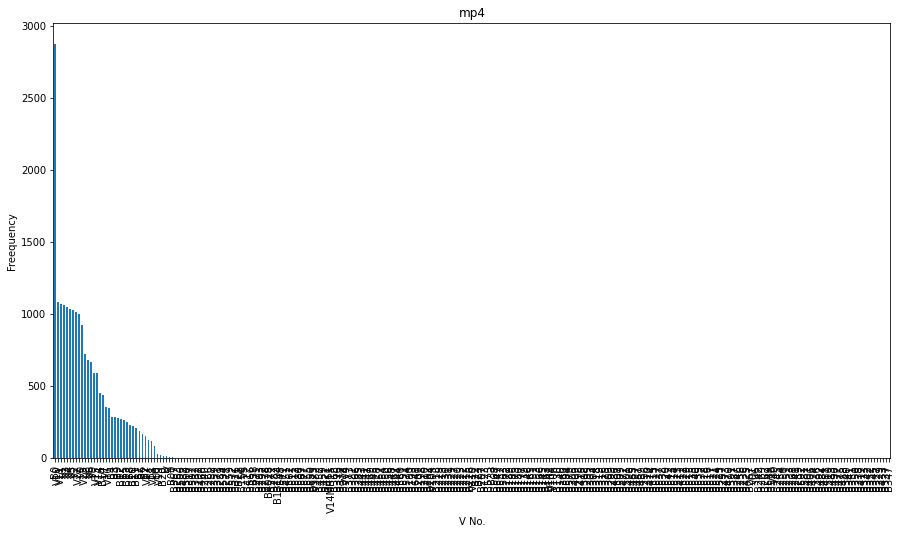

In [18]:
# Plots a bar chart for V No.
# X-Axis = V No.
# Y-Axis = Frequency
v_bar_plot(mp4_df,'mp4')

### Phase 1 V No. Count

In [19]:
mp4_series = mp4_df['V No.'].value_counts()
mp4_series

B0      2878
V10     1085
V11     1070
V1      1065
V3      1048
        ... 
B327       1
B329       1
B433       1
B337       1
B347       1
Name: V No., Length: 278, dtype: int64

In [20]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [21]:
confusion_matrix(mp4_df,'V No.', 'Year')

Year   1960  1961  1962  1963  1969  1971  1972  1973  1974  1975  ...  1983  \
V No.                                                              ...         
B         0     0     0     0     0     0     4     0     0     0  ...     0   
B0        2     0     0     0     0     1   357     0     1     1  ...    68   
B00       0     0     0     0     0     0     1     0     0     0  ...     0   
B1        0     0     0     0     0     0     2     0     0     0  ...     3   
B10       0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
V8        0     0     0     0     0     0     6     0     0     0  ...     0   
V80       0     0     0     0     0     0     0     0     0     0  ...     0   
V9        0     0     0     0     0     0     3     0     0     0  ...     0   
VS        0     0     0     0     0     0     0     0     0     0  ...     0   
VV4       0     0     0     0     0     0     0     0     0     0  ...     0   

Year   1984  1985  1986  1987  1988  1989  1990  2005  2006  
V No.                                                        
B         0     0     0     0     0     4     4     0     0  
B0       99   157   179   225   399    41    37     3     5  
B00       0     0     0     0     3     0     0     0     0  
B1        0     0     0     2    70     0     0     0     0  
B10       0     0     0     7   153    64     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
V8        0     0     0     0     0   295   238    58    85  
V80       0     0     0     0     0     0     0     0     0  
V9        0     0     0     0     0   300   270    17     0  
VS        0     0     0     0     0     0     0     0     2  
VV4       0     0     0     0     0     0     0     0     1  

[278 rows x 27 columns]